## 1차원 데이터
- 평균값(기댓값), 표본분산, 불편분산(ddof=1), 표준편차
- 표본분산은 '표본의 평균을 사용'해서 분산을 계산한 값으로 분산을 '과소 추정'하는 경향이 있으며 그 경향을 없애기 위한 것이 '불편분산'임. 표본분산 보다 조금 큰 값이 된다.
- 표준화 : 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
- 최댓값, 최솟값, 중앙값, 사분위수
- 표본분산과 비편향 분산
  - 분산은 표본 분산과 불편분산(unbiased variance)의 두 종류가 존재
  - 표본 분산은 표본에서 계산된 분산이며 모집단에 비해 '표본수가 적을 때'는 표본 분산이 모분산보다 '작아진다'.
  - 즉, 표본 분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 '비편향 분산'이라 한다. 
  - 통계학에서는 이 비편향분산을 사용하는 경우가 많다.
  - 불편분산은 n대신 n-1로 나누어 구할 수 있다.
 
[표분분산이 분산을 과소 평가하는 이유]

- 호수안에 물고기가 7마리가 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4, 샘플링1 3마리{1,2,3} 표본평균 2, 샘플링2 {5,6,7} 표본평균 6
- 이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N대신 N-1로 나누어 불편분산을 구할 수 있다.

In [1]:
# [과제1] 교재 ~51p 코드 문제 풀기

In [2]:
# [과제2] 20개의 원소로 구성되는 배열을 만들고 평균, 편차 및 편차의 합을 구하세요.

In [3]:
import numpy as np
arr = np.random.randint(range(20), 20)
print(np.mean(arr))
di =arr-np.mean(arr)
print(di)
di.sum()

12.8
[ -3.8 -10.8  -4.8  -6.8  -7.8  -0.8   1.2   0.2   0.2  -3.8  -2.8   3.2
   6.2   1.2   3.2   2.2   6.2   6.2   5.2   6.2]


-1.4210854715202004e-14

In [4]:
# [과제3] 중앙값 > 평균값 인 경우와 중앙값 < 평균값인 두 가지 집합에서 나타나는 가능성 있는 특징을 사례로 설명하세요.

In [5]:
# 예시 1 중앙값 > 평균값
arr_tall = np.array([180,185,181,181,180,150,155,156,150])
print(np.mean(arr_tall))
print(np.median(arr_tall))

# 범위 = np.max(arr_tall)-np.min(arr_tall)
# Q1 = np.percentile(arr_tall, 25)
# Q3 = np.percentile(arr_tall, 75)
# IQR = Q3-Q1

# if arr_tall <= (Q1 - IQR*1.5) or arr_tall >= (Q3 + IQR*1.5):
#     print(arr_tall)


# 평균은 배열의 대푯값이라고 말하기 어렵다. 그나마 중앙값이 배열에서 다수를 대표하고 있다고 말할 수 있다.

168.66666666666666
180.0


In [6]:
# 예시2 중앙값 < 평균값
arr_tall2 = np.array([180,185,181,181,180,154,155,150,155,156,150])
print(np.mean(arr_tall2))
print(np.median(arr_tall2))
# 이 경우에도 평균이 모든 값들의 대표를 하지는 못한다. 중앙값은 배열의 다수를 대표하고 있다.

166.0909090909091
156.0


220.0
250
100
100


<AxesSubplot:xlabel='0'>

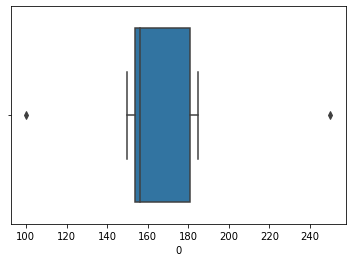

In [7]:
# [과제4] 4분위를 이용하여 이상치를 구하는 사례를 생성하고 시각화 및 이상치 산출하는 과정을 설명하세요.
import seaborn as sns
import numpy as np
import pandas as pd
arr_tall3 = np.array([250,180,185,181,181,180,154,155,150,155,156,150, 100])
범위 = np.max(arr_tall)-np.min(arr_tall)
Q1 = np.percentile(arr_tall, 25)
Q3 = np.percentile(arr_tall, 75)
IQR = Q3-Q1
print(Q3 + IQR*1.5)
for i in arr_tall3:
    if i <= (Q1 - IQR*1.5) or i >= (Q3 + IQR*1.5):
        print(i)
    else:
        pass
print(i)

df_h = pd.DataFrame(arr_tall3)
df_h

sns.boxplot(x = 0, data=df_h)

In [8]:
# [과제5] 표본분산과 불편분산의 차이를 사례를 들어 설명하세요.

print(np.var(arr_tall3))
print(df_h.var())

# 표본분산이 불편분산보다 값이 더 작은 것을 확인할 수 있다. 표본분산의 경우 
# 모분산의 값을 과소평가하는 경우가 있다. 이러한 현상을 방지하기 위해 불편분산에서는
# 기존 n값으로 나눠주지 않고 n-1값으로 나눠서 좀 더 모분산에 가까운 값을 보여주려 한다.

1045.01775147929
0    1132.102564
dtype: float64


In [9]:
import pandas as pd
import numpy as np
%precision 3


df = pd.read_csv('ch2_scores_em.csv', index_col = 'student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [10]:
scores = np.array(df['english'])[:10]

scores_df = pd.DataFrame({'score':scores},
                        index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], name = 'student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [11]:
#평균값
sum(scores)/len(scores)

55.000

In [12]:
np.mean(scores)

55.000

In [13]:
scores_df.mean()

score    55.0
dtype: float64

In [14]:
# 중앙값
sort_score = np.sort(scores)

n = len(sort_score)
if n%2 == 0:
    m0 = sort_score[n//2-1]
    m1 = sort_score[n//2]
    median = (m0+m1)/2
else:
    median = sort_score[(n+1)//2-1]
    
median

56.500

In [15]:
np.median(scores)

56.500

In [16]:
scores_df.median()

score    56.5
dtype: float64

In [17]:
#최빈값
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [18]:
pd.Series([1,2,3,4,5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [19]:
#편차
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [20]:
#편차의 평균값은 항상 0
np.mean(deviation)

0.000

In [21]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [22]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

In [23]:
# 분산
np.mean(deviation**2)

86.000

In [24]:
#표본분산
np.var(scores)

86.000

In [25]:
#불편분산(n-1로 나눈 것)
print(scores_df.var())
#판다스 표본분산
print(scores_df.var(ddof=0))

score    95.555556
dtype: float64
score    86.0
dtype: float64


In [26]:
#표본분산
summary_df['square of deviation'] = np.square(deviation)
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [27]:
#표준편차
np.sqrt(np.var(scores, ddof=0))

9.274

In [28]:
#표준편차 numpy
np.std(scores, ddof=0)

9.274

In [29]:
#범위
np.max(scores)-np.min(scores)

28

In [30]:
#사분위범위
scores_Q1 = np.percentile(scores,25)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.000

In [31]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

#### 0823 과제 1.
- p.52_83 예제 문제 풀어보기

In [32]:
df = pd.read_csv('ch2_scores_em.csv', index_col = 'student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [33]:
scores = np.array(df.english)[:10]

In [34]:

scores_df = pd.DataFrame({'score':scores},
                        index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], name = 'student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [35]:
#표준화
z = (scores - np.mean(scores))/np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [36]:
# 편찻값(평균이 50, 표준편차 10이 되도록 정규화한 값)

z_50 = 50 + 10* (scores - np.mean(scores))/np.std(scores)
z_50

scores_df['deviation_value'] = z_50
scores_df

,score,deviation_value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


In [37]:
# 히스토그램
engl_scores = np.array(df.english)
freq,_ = np.histogram(engl_scores, bins= 10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [38]:
# 히스토그램을 이용한 도수분포표
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'frequency':freq},
                           index=pd.Index(freq_class, name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [39]:
#계급값(계급의 중앙값)
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [40]:
#상대도수
rel_freq = freq/freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [41]:
# 누적상대도수
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [42]:
freq_dist_df['class_value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq

freq_dist_df

,frequency,class_value,relative frequency,cumulative relative frequency
class,,,,
0~10,0,5,0.00,0.00
10~20,0,15,0.00,0.00
20~30,0,25,0.00,0.00
30~40,2,35,0.04,0.04
40~50,8,45,0.16,0.20
50~60,16,55,0.32,0.52
60~70,18,65,0.36,0.88
70~80,6,75,0.12,1.00
80~90,0,85,0.00,1.00


In [43]:
#최빈값 재검토
# idmin() : 데이터 프레임 내 값 가운데 최소값의 인덱스 위치 반환
# idmax() : 데이터 프레임 내 값 가운데 최고값의 인덱스 위치 반환

freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class_value']

65

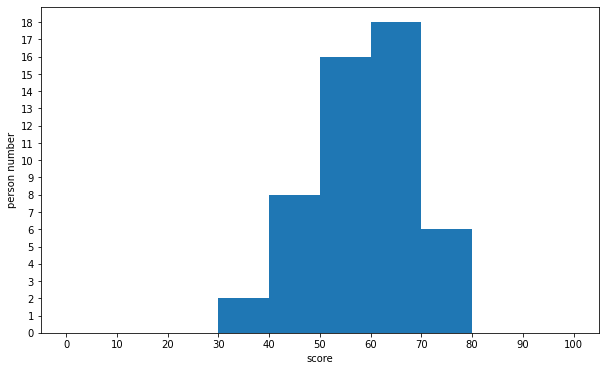

In [44]:
#히스토그램 그리기(계급값 10)
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,6))
# 인수의 영역을 1*1개 지정, 하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

freq,_,_ = ax.hist(engl_scores, bins = 10, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 10+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()

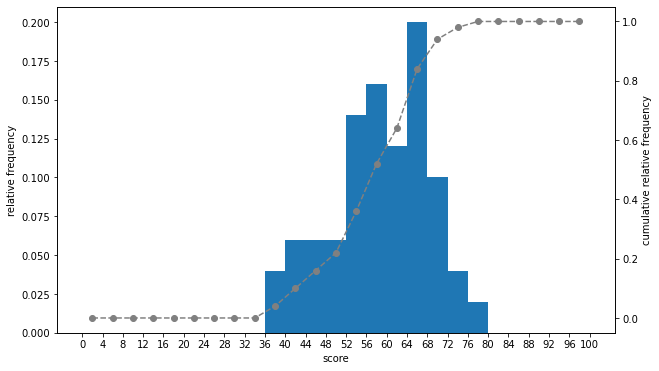

In [45]:
fig = plt.figure(figsize=(10,6))
# 인수의 영역을 1*1개 지정, 하나의 영역에 그린다는 것을 의미
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()
# 상대도수의 히스토그램으로 하기 위해서는 도수를 데이터의 수로 나눌 필요가 있음
# 이것은 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(engl_scores)/len(engl_scores)
rel_freq,_,_ = ax1.hist(engl_scores, bins=25, range=(0,100),weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value =[(i+(i+4))//2 for i in range(0,100,4)]
# 꺾은선 그래프를 그림
# 인수 ls를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o'으로 하면 데이터 점을 그림
# 인수 color를 'gray'로 하면 회색으로 지정

ax2.plot(class_value, cum_rel_freq, ls='--', marker = 'o', color='gray')
#꺾은선 그래프의 눈금선을 제거
ax2.grid(visible = False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()



#### Box plot 의미 해석

* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
* 이상치: lower whisker, upper whisker를 벗어나는 값


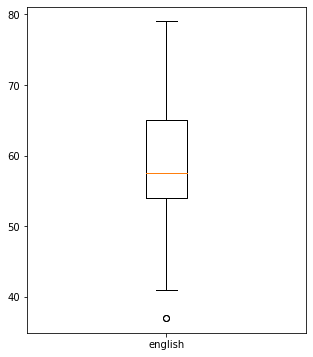

In [46]:
fig = plt.figure(figsize = (5,6))
ax = fig.add_subplot(111)
ax.boxplot(engl_scores, labels = ['english'])\

plt.show()

In [47]:
en_scores = np.array(df.english)[:10]
ma_scores = np.array(df.mathematics)[:10]

score_df = pd.DataFrame({'english':en_scores,
                        'mathematics':ma_scores},
                       index = pd.Index(['A','B','C','D','E','F','G','H','I','J'], name = 'student'))
score_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [48]:
# 공분산
summary_df = score_df.copy()
summary_df['english_deviation'] = summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviation'] = summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

#공분산 계산
summary_df['product of deviation'].mean()

62.800

In [49]:
#Numpy 공분산 함수(공분산행렬)
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [50]:
# 상관계수

cov_mat[0,1]/(np.std(en_scores)*np.std(ma_scores))

# Numpy 상관계수 함수(상관행렬)
np.corrcoef(en_scores,ma_scores)
# DataFrame 상관계수 구하기
score_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


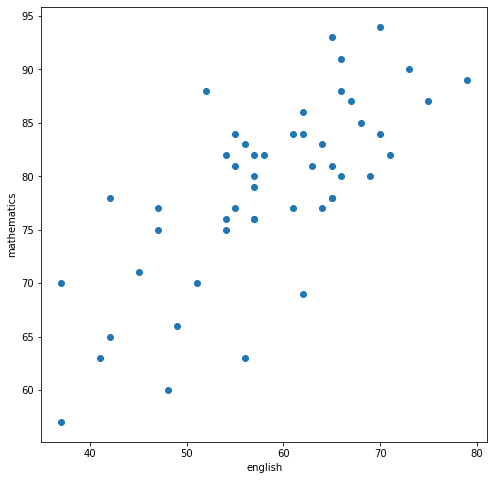

In [51]:
#산점도

english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

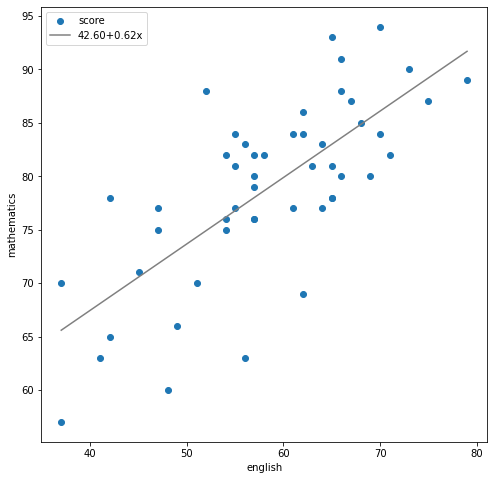

In [52]:
# 회귀직선
# 계수 베타0와 베타1을 구한다.
poly_fit = np.polyfit(english_scores, math_scores, 1)
# 베타0 + 베타1 x를 반환하는 함수 작성
poly_1d = np.poly1d(poly_fit)
#직선을 그리기 위해 x좌표를 생성
xs = np.linspace(english_scores.min(),english_scores.max())
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.scatter(english_scores, math_scores, label = 'score')
ax.plot(xs, ys, color = 'gray',
       label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

#범례표시
ax.legend(loc='upper left')

plt.show()

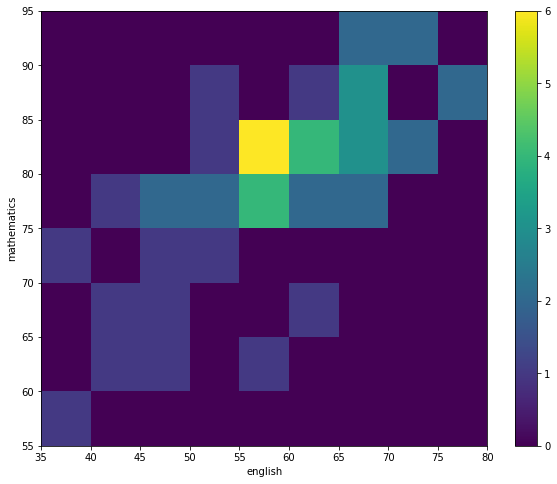

In [53]:
#히트맵
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores,math_scores, bins=[9,8], range=[(35,80),(55,95)])

ax.set_xlabel('english')
ax.set_ylabel('mathematics')

ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax=ax)
plt.show()

#### 0823 과제 2.
일차원 데이터를 생성하여 다음을 수행하세요.
- 도수분포표를 만들고 히스토그램으로 시각화하세요.(계급을 변경하여 2개를 작성)
- 상대도수 및 누적상대도수를 도수분포표에 추가하고 히스토그램과 누적상대도수를 시각화하세요.

In [54]:
df_work = pd.read_csv('C:/cakd7/taxi_project/Taxi_project/장애인취업률포함.csv')
arr = df_work['연금 미수급자중 시설 필요자 수']
arr

0     57
1     60
2     38
3     66
4     56
5     38
6     50
7     28
8     65
9     40
10    40
11    47
12    43
13    36
14    42
15    32
16    50
17    74
18    47
19    46
20    25
21    50
22     8
23    17
24    46
Name: 연금 미수급자중 시설 필요자 수, dtype: int64

In [55]:
df_work

,동별,연도별 평균 증감율,장애인연금_대상자에서수급자비율,연금 미수급자중 시설 필요자 수,심한장애중_장애인연금_대상자비율,심않장중_기초및차상위_비율,장애인취업률
0,강남구,-0.7,0.64,57,0.56,0.29,0.045910
1,강동구,1.4,0.63,60,0.54,0.20,0.009670
2,강북구,0.1,0.74,38,0.54,0.32,0.003622
3,강서구,0.2,0.76,66,0.55,0.37,0.009949
4,관악구,0.1,0.64,56,0.51,0.24,0.008510
5,광진구,-0.2,0.58,38,0.50,0.18,0.010202
6,구로구,1.3,0.65,50,0.52,0.19,0.013334
7,금천구,1.0,0.69,28,0.52,0.27,0.028888
8,노원구,-0.4,0.77,65,0.56,0.38,0.003977
9,도봉구,0.4,0.68,40,0.53,0.22,0.005556


In [56]:
# 히스토그램
freq,_ = np.histogram(arr, bins= 10, range=(0,100))
freq

array([1, 1, 2, 4, 8, 5, 3, 1, 0, 0], dtype=int64)

In [57]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'frequency':freq},
                           index=pd.Index(freq_class, name='class'))
freq_dist_df

,frequency
class,
0~10,1
10~20,1
20~30,2
30~40,4
40~50,8
50~60,5
60~70,3
70~80,1
80~90,0


In [58]:
#계급값(계급의 중앙값)
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [59]:
#상대도수
rel_freq = freq/freq.sum()
rel_freq

array([0.04, 0.04, 0.08, 0.16, 0.32, 0.2 , 0.12, 0.04, 0.  , 0.  ])

In [60]:
# 누적상대도수
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.04, 0.08, 0.16, 0.32, 0.64, 0.84, 0.96, 1.  , 1.  , 1.  ])

In [61]:
freq_dist_df['class_value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq

freq_dist_df

,frequency,class_value,relative frequency,cumulative relative frequency
class,,,,
0~10,1,5,0.04,0.04
10~20,1,15,0.04,0.08
20~30,2,25,0.08,0.16
30~40,4,35,0.16,0.32
40~50,8,45,0.32,0.64
50~60,5,55,0.20,0.84
60~70,3,65,0.12,0.96
70~80,1,75,0.04,1.00
80~90,0,85,0.00,1.00


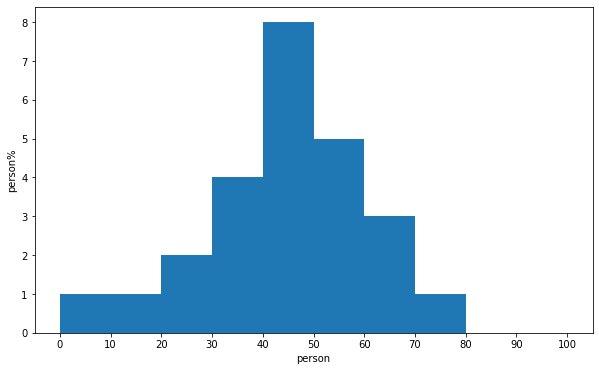

In [62]:
#히스토그램 그리기(계급값 10)
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,6))
# 인수의 영역을 1*1개 지정, 하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

freq,_,_ = ax.hist(arr, bins = 10, range=(0,100))
ax.set_xlabel('person')
ax.set_ylabel('person%')
ax.set_xticks(np.linspace(0, 100, 10+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()

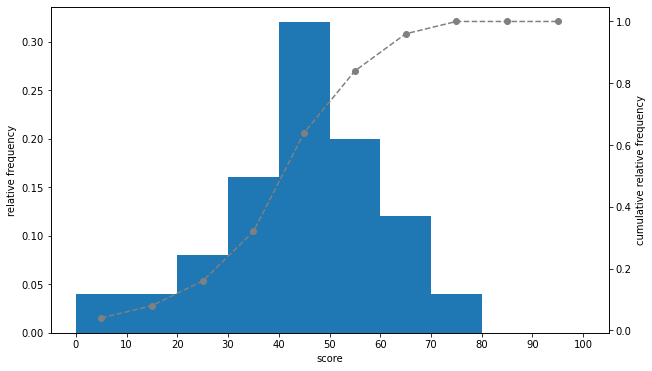

In [63]:
fig = plt.figure(figsize=(10,6))
# 인수의 영역을 1*1개 지정, 하나의 영역에 그린다는 것을 의미
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()
# 상대도수의 히스토그램으로 하기 위해서는 도수를 데이터의 수로 나눌 필요가 있음
# 이것은 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(arr)/len(arr)
rel_freq,_,_ = ax1.hist(arr, bins=10, range=(0,100),weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value =[(i+(i+10))//2 for i in range(0,100,10)]
# 꺾은선 그래프를 그림
# 인수 ls를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o'으로 하면 데이터 점을 그림
# 인수 color를 'gray'로 하면 회색으로 지정

ax2.plot(class_value, cum_rel_freq, ls='--', marker = 'o', color='gray')
#꺾은선 그래프의 눈금선을 제거
ax2.grid(visible = False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 10 +1))

plt.show()

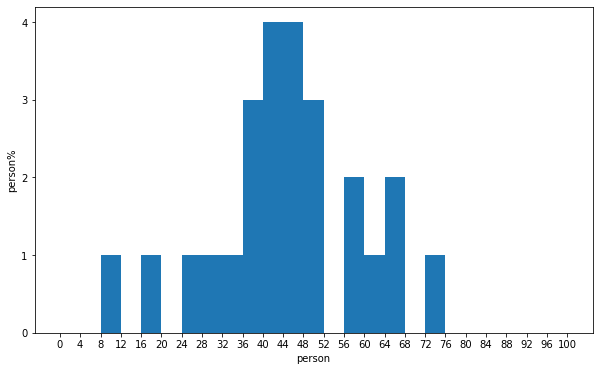

In [64]:
#히스토그램 그리기(계급값 4)
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,6))
# 인수의 영역을 1*1개 지정, 하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

freq,_,_ = ax.hist(arr, bins = 25, range=(0,100))
ax.set_xlabel('person')
ax.set_ylabel('person%')
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()

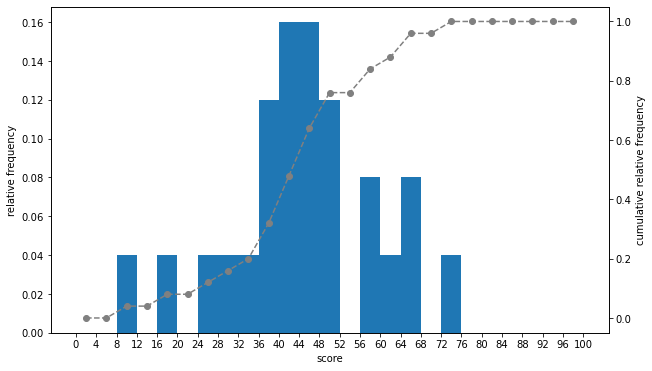

In [65]:
fig = plt.figure(figsize=(10,6))
# 인수의 영역을 1*1개 지정, 하나의 영역에 그린다는 것을 의미
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()
# 상대도수의 히스토그램으로 하기 위해서는 도수를 데이터의 수로 나눌 필요가 있음
# 이것은 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(arr)/len(arr)
rel_freq,_,_ = ax1.hist(arr, bins=25, range=(0,100),weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value =[(i+(i+4))//2 for i in range(0,100,4)]
# 꺾은선 그래프를 그림
# 인수 ls를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o'으로 하면 데이터 점을 그림
# 인수 color를 'gray'로 하면 회색으로 지정

ax2.plot(class_value, cum_rel_freq, ls='--', marker = 'o', color='gray')
#꺾은선 그래프의 눈금선을 제거
ax2.grid(visible = False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

#### 0823 과제 3.
이차원 데이터를 생성하여 다음을 수행하세요.(데이터 수 각각 1000개 이상)

- 공분산 및 상관계수를 구하세요.
- 이차원 데이터를 산점도, 히트맵으로 시각화한 후, 인사이트를 기술하세요.

In [66]:
df_work

,동별,연도별 평균 증감율,장애인연금_대상자에서수급자비율,연금 미수급자중 시설 필요자 수,심한장애중_장애인연금_대상자비율,심않장중_기초및차상위_비율,장애인취업률
0,강남구,-0.7,0.64,57,0.56,0.29,0.045910
1,강동구,1.4,0.63,60,0.54,0.20,0.009670
2,강북구,0.1,0.74,38,0.54,0.32,0.003622
3,강서구,0.2,0.76,66,0.55,0.37,0.009949
4,관악구,0.1,0.64,56,0.51,0.24,0.008510
5,광진구,-0.2,0.58,38,0.50,0.18,0.010202
6,구로구,1.3,0.65,50,0.52,0.19,0.013334
7,금천구,1.0,0.69,28,0.52,0.27,0.028888
8,노원구,-0.4,0.77,65,0.56,0.38,0.003977
9,도봉구,0.4,0.68,40,0.53,0.22,0.005556


In [67]:
en_scores = np.array(df_work['심한장애중_장애인연금_대상자비율'])
ma_scores = np.array(1-df_work['장애인연금_대상자에서수급자비율'])

score_df = pd.DataFrame({'심한장애중_장애인연금_대상자비율':en_scores,
                        '연금대상자중비수급자':ma_scores},
                       index = pd.Index(df_work['동별'], name = '구별'))
score_df

,심한장애중_장애인연금_대상자비율,연금대상자중비수급자
구별,,
강남구,0.56,0.36
강동구,0.54,0.37
강북구,0.54,0.26
강서구,0.55,0.24
관악구,0.51,0.36
광진구,0.50,0.42
구로구,0.52,0.35
금천구,0.52,0.31
노원구,0.56,0.23


In [68]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[ 0.   , -0.   ],
       [-0.   ,  0.005]])

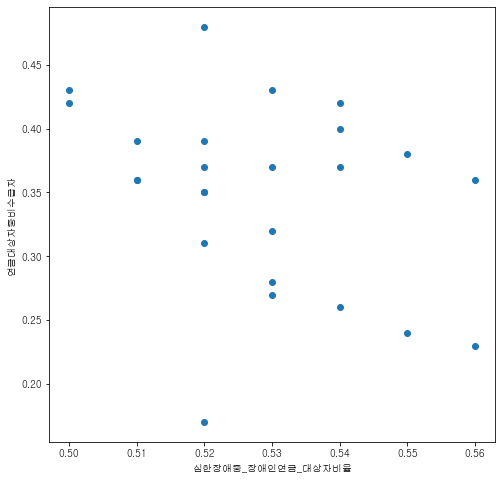

In [69]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.scatter(en_scores, ma_scores, label = df_work['동별'])
ax.set_xlabel('심한장애중_장애인연금_대상자비율')
ax.set_ylabel('연금대상자중비수급자')

plt.show()

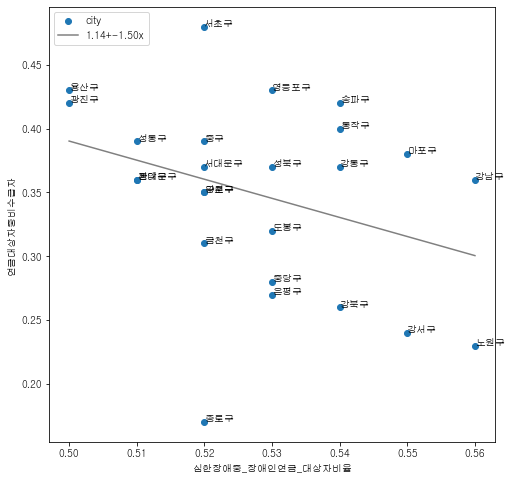

In [70]:
# 회귀직선
# 계수 β0와 β1을 구한다.
poly_fit = np.polyfit(en_scores, ma_scores, 1)
# β0 + β1 x를 반환하는 함수 작성
poly_1d = np.poly1d(poly_fit)
#직선을 그리기 위해 x좌표를 생성
xs = np.linspace(en_scores.min(),en_scores.max())
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.scatter(en_scores, ma_scores, label = 'city')
ax.plot(xs, ys, color = 'gray',
       label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.set_xlabel('심한장애중_장애인연금_대상자비율')
ax.set_ylabel('연금대상자중비수급자')

#범례표시
ax.legend(loc='upper left')
for i in score_df.itertuples():
    plt.annotate(i[0], (i[1],i[2]))

plt.show()

# 간단하게 중증장애인 중 연금대상자가 늘어나면, 연금대상자 중 비수급자가 줄어든다.
# 연금대상자를 늘리면 비수급자가 줄어든다?
# 연금 대상자를 늘리는 방안은? 
# >> 연금 대상 기준 개정을 통해 더 많은 장애인이 받을 수 있게 만든다.

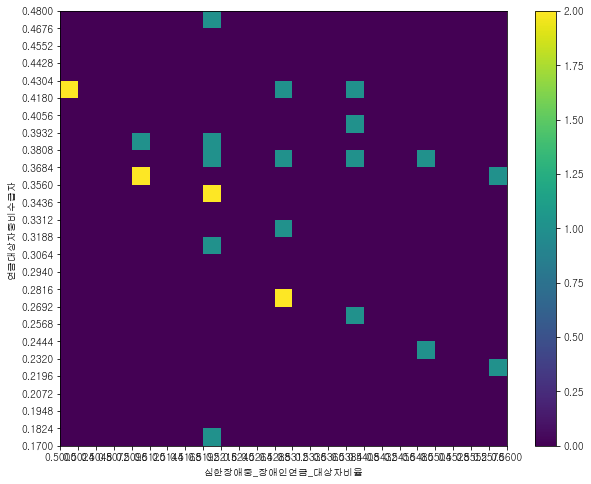

In [71]:
#히트맵
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(en_scores,ma_scores, bins = [25,25])

ax.set_xlabel('심한장애중_장애인연금_대상자비율')
ax.set_ylabel('연금대상자중비수급자')

ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax=ax)
plt.show()

In [72]:
#npy 형식으로 저장된 numpy array 읽기
import numpy as np
anscombe_data = np.load('ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [73]:
import pandas as pd
stats_df = pd.DataFrame(index = ['X_mean', 'X_variance', 'Y_mean','Y_variance','X&Y_correlation','X&Y_regression line'])

for i,data in enumerate(anscombe_data):
    dataX = data[:,0]
    dataY = data[:,1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] = [f'{np.mean(dataX):.2f}',
                             f'{np.var(dataX):.2f}',
                             f'{np.mean(dataY):.2f}',
                             f'{np.var(dataY):.2f}',
                             f'{np.corrcoef(dataX,dataY)[0,1]:.2f}',
                             f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


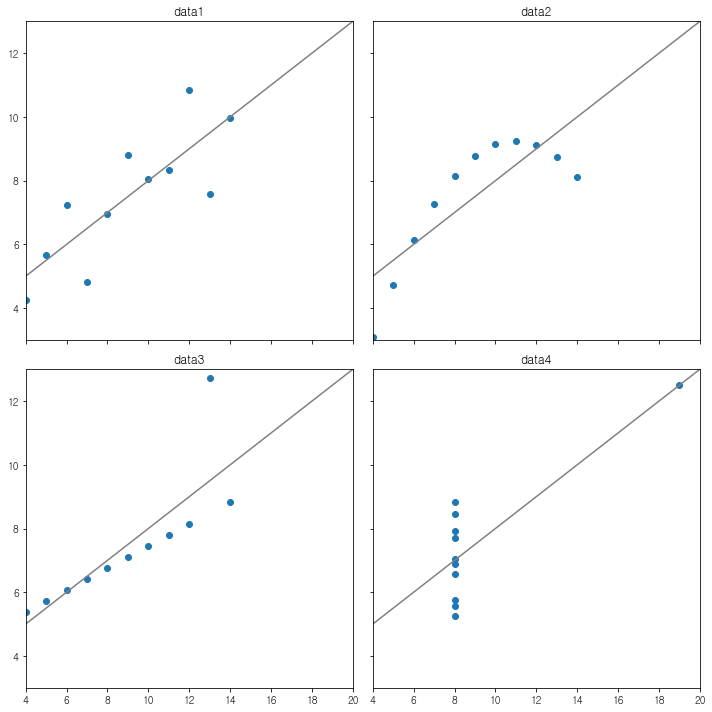

In [74]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,10), sharex=True,sharey=True)

xs = np.linspace(0,30,100)
for i,data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1],1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역을 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4,20])
    ax.set_ylim([3,13])
    
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0],data[:,1])
    ax.plot(xs,ys,color='gray')
    
plt.tight_layout()
plt.show()

### polyfit 함수 사용법
poly(x,y,차수) 형태로 매우 간단하게 이용이 가능, 

In [75]:
x = [1,2,3,4,5,6]
y = [1,3,6,8,11,19]

print(np.polyfit(x,y,1))
#y = 3.314x -3.6 (일차방정식)

[ 3.314 -3.6  ]


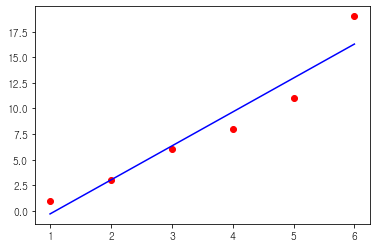

In [76]:
poly = np.polyfit(x,y,1)
y_pred = np.array(x)*poly[0] +poly[1]

plt.plot(x,y_pred, color = 'b')
plt.scatter(x,y,color='r')
plt.show()

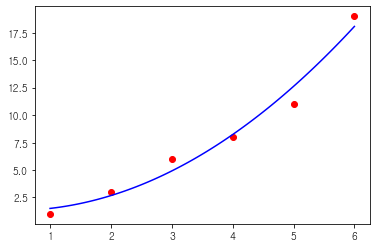

In [77]:
# 2차 회귀식 및 시각화
poly = np.polyfit(x,y,2)
poly
x_line = np.linspace(1,6,100) #곡선을 완만하게 그리기 위한 linspace
y_pred = x_line**2*poly[0] + x_line*poly[1] + poly[2]

plt.plot(x_line, y_pred, color = 'b')
plt.scatter(x,y,color='r')
plt.show()

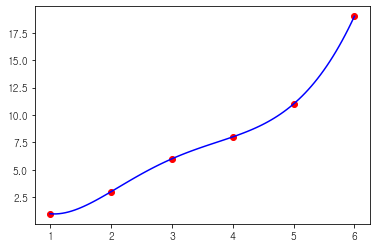

In [78]:
# 3차 이상(5차)
poly = np.polyfit(x,y,5)
poly

x_line = np.linspace(1,6,100)

y_pred = np.zeros_like(x_line) #예측값을 담을 그릇(모든 값이 0인 배열)

for i in range(6):
    y_pred += x_line**(5-i)*poly[i]

plt.plot(x_line, y_pred, color='b')
plt.scatter(x,y,color='r')
plt.show()

#### 과제0824_1
p84~p112 코드 문제를 모두 풀어보세요.

#### 과제0824_2
적절한 데이터를 생성하고 polyfit을 이용하여 2,3차 방정식을 만든 후 산점도 및 회귀식을 시각화하여 그 의미를 해석하세요.

In [79]:
x = np.random.randint(1, 100, 10)
y = np.random.randint(1, 100, 10)

poly = np.polyfit(x, y, 2)
poly

array([ 4.901e-03, -2.083e-01,  5.072e+01])

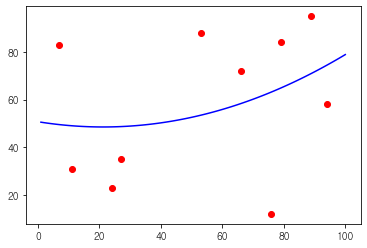

In [80]:
# 2차 회귀식 및 시각화
poly = np.polyfit(x,y,2)
poly
x_line = np.linspace(1,100,100) #곡선을 완만하게 그리기 위한 linspace
y_pred = x_line**2*poly[0] + x_line*poly[1] + poly[2]

plt.plot(x_line, y_pred, color = 'b')
plt.scatter(x,y,color='r')
plt.show()

[-5.098e-04  8.339e-02 -3.516e+00  8.089e+01]


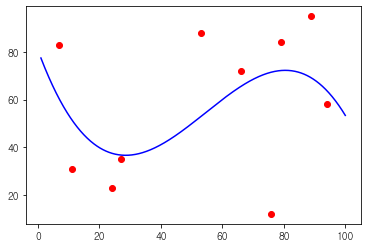

In [81]:
# 3차 방정식
poly = np.polyfit(x,y,3)
print(poly)

x_line = np.linspace(1,100,1000)

# y_pred = np.zeros_like(x_line) #예측값을 담을 그릇(모든 값이 0인 배열)

# for i in range(3):
#     y_pred += x_line**(4-i)*poly[i]
y_pred = x_line**3*poly[0]+ x_line**2*poly[1] + x_line*poly[2] + poly[3]

plt.plot(x_line, y_pred, color='b')
plt.scatter(x,y,color='r')
plt.show()

#### 과제0824_3
"어떤 모집단에서 표본을 랜덤하게 추출하여 표본평균을 구하면 그 표본평균은 모평균을 중심으로 분포한다"라는 주장을 사례를 만들어서 설득력있게 설명하세요.

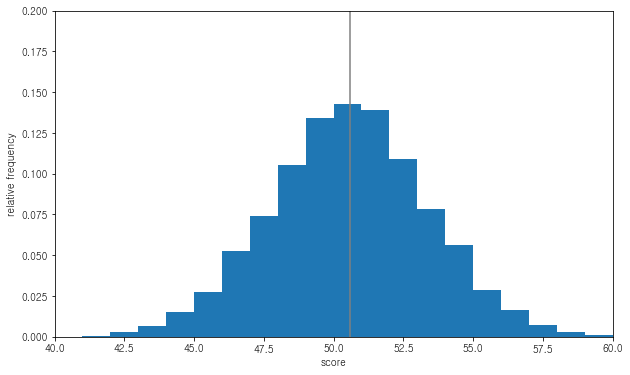

In [82]:
# 모집단도 랜덤으로 뽑아보았다.
import numpy as np
moj = np.random.randint(1,100, 1000)

sample = [np.random.choice(moj, 100).mean() for _ in range(10000)]



fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0,100), density = True)
ax.vlines(np.mean(moj), 0 ,1,'gray')
ax.set_xlim(40,60)
ax.set_ylim(0, 0.2)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

# 모집단을 랜덤으로 뽑았다는 것은 어떤 조건의 숫자 데이터든 적용되었다는 것이다.
# 그 중에서 표본을 뽑고 표본의 평균값이 어디에 몰려있는지에 대해 알아보았다.
# 이 경우에 항상 모집단의 평균을 중심으로 표본 값의 평균이 모이는 것을 알 수 있었다. 
# 이러한 현상은 특정한 조건에 의해서 발생하는 것이 아니고 어느 모집단이든 그 곳에서 표본평균을 구하면 모집단의 평균과 근사치의 값이 될 수 있단 것을 시사한다.

In [83]:
# 우리가 만드는 것은 일반화 모델, 데이터를 정확히 보여주는게 문제가 아니다. 저런 경우는 과적합이라고 말할 수 있다.

In [84]:
# 추측통계 기본
# 모집단에서 표본을 무작위 추출하는게 전제
# np.random.choice 함수의 기본설정은 복원추출
np.random.choice([1,2,3],3)

array([3, 3, 1])

In [85]:
# 비복원추출
np.random.choice([1,2,3],3, replace = False)

array([1, 3, 2])

In [86]:
# 시드 사용, 동일한 난수 획득
np.random.seed(0)
np.random.choice([1,2,3],3)

array([1, 2, 1])

In [87]:
# 무작위추출 표본평균

np.random.seed(0)
sample = np.random.choice([1,2,3,10,5,6,7,8,15],10)
sample.mean()

6.700

In [88]:
mo = [1,2,3,10,5,6,7,8,15]
np.mean(mo)

6.333

In [89]:
for i in range(5):
    sample = np.random.choice(mo,10)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균', sample.mean())

1번째 무작위 추출로 얻은 표본평균 8.5
2번째 무작위 추출로 얻은 표본평균 7.6
3번째 무작위 추출로 얻은 표본평균 5.7
4번째 무작위 추출로 얻은 표본평균 5.0
5번째 무작위 추출로 얻은 표본평균 7.1


In [90]:
# 확률변수 중, 불공정한 주사위 확률변수
dice = [1,2,3,4,5,6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]
np.random.choice(dice,p=prob)

5

In [91]:
num_trial = 100
sample=np.random.choice(dice,num_trial,p=prob)
sample

array([3, 2, 4, 4, 5, 4, 6, 2, 3, 3, 5, 3, 4, 3, 3, 2, 5, 2, 3, 4, 6, 2,
       6, 2, 6, 4, 6, 5, 6, 1, 3, 2, 4, 2, 4, 4, 2, 5, 5, 3, 5, 2, 5, 6,
       4, 5, 2, 6, 4, 3, 5, 1, 6, 1, 5, 3, 6, 6, 3, 5, 5, 5, 3, 6, 4, 6,
       5, 4, 6, 4, 6, 5, 6, 5, 6, 5, 6, 5, 4, 5, 1, 4, 5, 4, 5, 4, 2, 4,
       5, 5, 5, 5, 5, 4, 6, 4, 4, 6, 6, 5])

In [92]:
freq,_ = np.histogram(sample, bins=6, range = (1,7))
pd.DataFrame({'frequency':freq,
             'relative frequency' : freq/num_trial},
            index = pd.Index(np.arange(1,7), name = 'dice'))


,frequency,relative frequency
dice,,
1,4,0.04
2,12,0.12
3,13,0.13
4,22,0.22
5,28,0.28
6,21,0.21


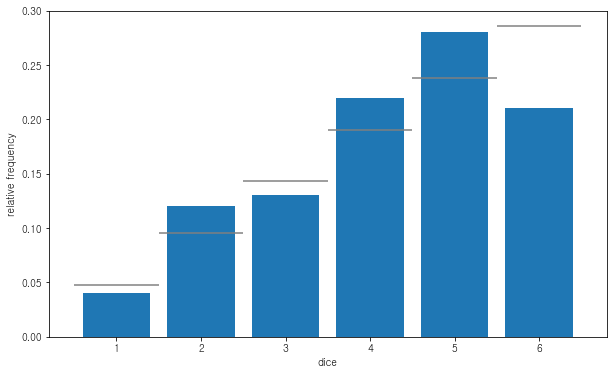

In [93]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density = True, rwidth = 0.8)
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors = 'gray')
ax.set_xticks(np.linspace(1.5,6.5,6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

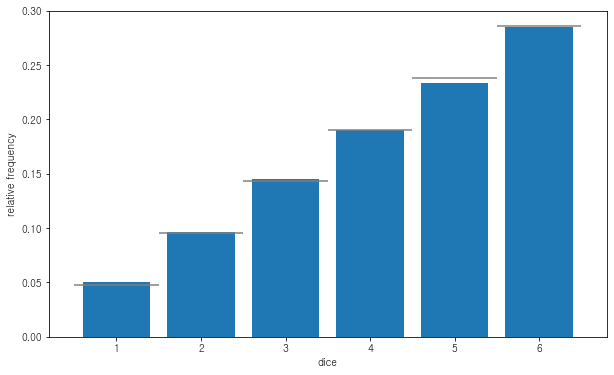

In [94]:
num_trial = 10000
sample=np.random.choice(dice,num_trial,p=prob)
sample

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density = True, rwidth = 0.8)
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors = 'gray')
ax.set_xticks(np.linspace(1.5,6.5,6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

In [95]:
df = pd.read_csv('ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

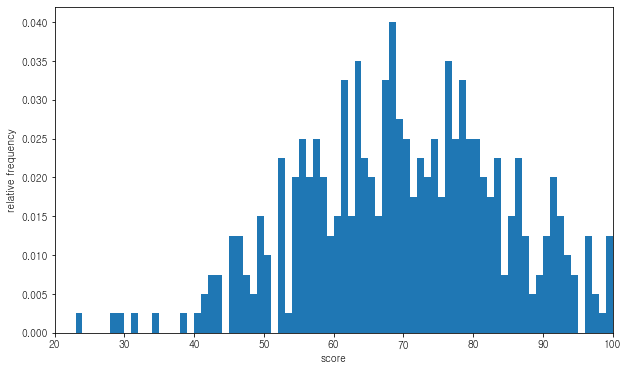

In [96]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0,100), density = True)

ax.set_xlim(20,100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [97]:
np.random.choice(scores)

55

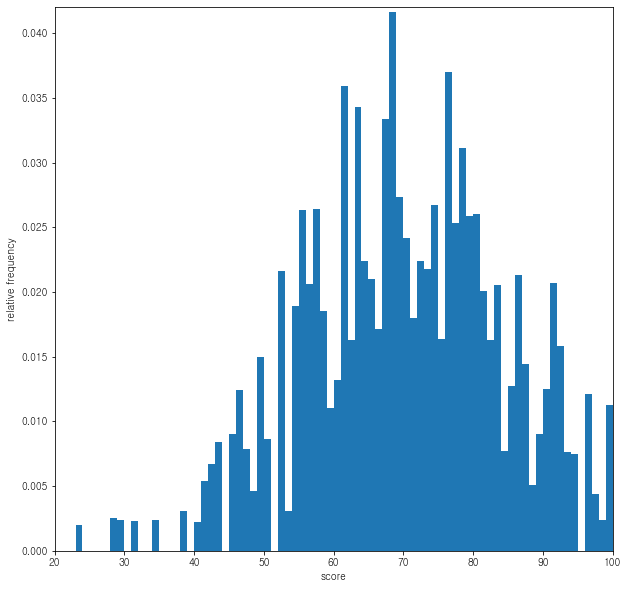

In [98]:
sample=np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0,100), density = True)

ax.set_xlim(20,100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

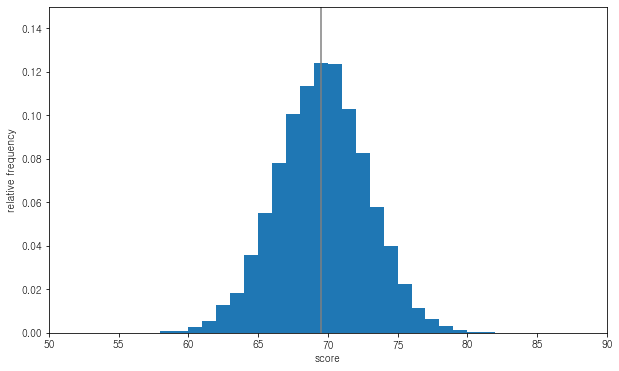

In [99]:
sample_means = [np.random.choice(scores,20).mean() for _ in range(10000)]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0,100), density = True)
ax.vlines(np.mean(scores), 0 ,1,'gray')
ax.set_xlim(50,90)
ax.set_ylim(0, 0.15)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

## 이산형 확률변수

In [203]:
# 1차원
import numpy as np
import matplotlib.pyplot as plt

%precision 3

'%.3f'

In [204]:
# 확률변수의 인수의 값을 정함
x_set = np.array([1,2,3,4,5,6])
# 확률변수의 인수의 값이 가지는 확률을 정의함
def f(x):
    if x in x_set:
        return x/21
    else:
        return 0


In [205]:
# 확률변수가 취할 수 있는 값의 집합과 확률변수의 세트가 확률분포, 확률변수 X의 동작이 결정됨
# 이를 리스트로 구현
X = [x_set, f]
# 확률을 구하는 식
prob = np.array([f(x_k) for x_k in x_set])
print(prob, '\n')
print(X)
dict(zip(x_set, prob))


[0.048 0.095 0.143 0.19  0.238 0.286] 

[array([1, 2, 3, 4, 5, 6]), <function f at 0x000002B604F3A8B0>]


{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

Text(0.5, 1.0, 'Bar Graph')

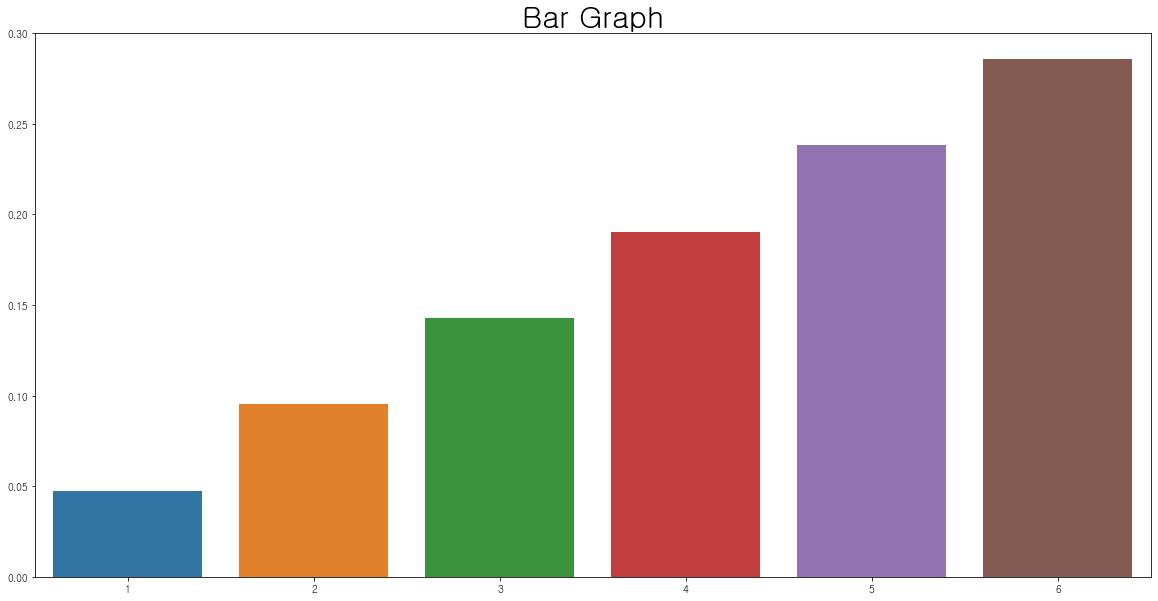

In [206]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (20, 10))
sns.barplot(x_set, prob)
plt.title('Bar Graph', fontsize = 30)

In [207]:
# 확률의 성질, 확률은 절대적으로 0 이상
np.all(prob >= 0)

True

In [208]:
# 확률의 시그마는 1이 됨
np.sum(prob)

1.000

In [209]:
# 누적분포함수(분포함수), 확률변수 X가 인수 이하가 될 때의 확률을 뜻하기도 함.
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])


In [210]:
F(5)

0.714

In [211]:
# 확률변수의 변환 : 확률변수 x에 2를 곱하고 3을 더한 2x + 3도 확률변수가 된다.

y_set = np.array([2*x_k +3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])

dict(zip(y_set,prob))

{5: 0.048, 7: 0.095, 9: 0.143, 11: 0.190, 13: 0.238, 15: 0.286}

In [212]:
# 1차원 이산형 확률변수의 지표
# 기댓값(확률변수의 평균) 구하기
# 기댓값 : 시그마(인수(확률변수의 값) * 확률)
np.sum([x_k*f(x_k) for x_k in x_set])

4.333

In [213]:
# 확률변수의 기댓값은 확률변수를 무제한 시행하여 얻은 실현값의 평균 1e6 = 백만
sample = np.random.choice(x_set, int(1e6), p = prob)
np.mean(sample)

4.332

In [214]:
# 확률 없이 표본을 뽑아 평균을 냄
sample = np.random.choice(x_set, int(1e6))
np.mean(sample)

3.498

In [215]:
# 위와 동일한 상황, 여기선 각 숫자가 뽑힐 확률이 1/6로 동일함
s1 = np.random.choice(x_set, int(10))
np.mean(s1)

3.900

In [216]:
# 특정 확률을 주어주고 뽑는 경우, 특정 확률에 따라 각 숫자가 뽑힐 확률이 다름
s2 = np.random.choice(x_set, int(10), p=prob)
np.mean(s2)

4.000

In [217]:
# 일반화
# 여기서 g는 확률변수의 변환을 염두해두고 인수를 받는 함수이다.
# 기댓값 식으로 정의 : E(g(X)) = Σg(x)*f(x)
def E(X, g = lambda x: x):
    x_set, f = X # X는 확률분포 > 확률변수가 가질 수 있는 변수와 확률의 집합
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])

In [218]:
E(X)

4.333

In [219]:
# 기댓값의 선형성
E(X, g=lambda x : 2*x + 3)

11.667

In [220]:
2*E(X) +3

11.667

In [221]:
# 분산 = 편차제곱의 기댓값
mean = E(X)
np.sum([(x_k - mean)**2*f(x_k) for x_k in x_set])

2.222

In [222]:
# 분산 일반화, 변환 가능 함수 g를 인수에 적용해서 확률변수 X의 기댓값을 빼준다.
def V(X, g=lambda x:x):
    x_set, f = X
    mean = E(X,g)
    return np.sum([(g(x_k) - mean)**2*f(x_k) for x_k in x_set])

In [223]:
V(X)

2.222

In [224]:
# 분산의 변환은 기울기의 제곱을 하는 식이다.
V(X, lambda x : 2*x + 3)

8.889

#### 과제 0825_1
p114 ~ p142 예제를 모두 풀어보세요.

In [ ]:
# 2차원 이산형 확률변수
# 1차원 확률분포 2개를 동시에 다룬다. 
# X,Y = {(xi, yj)| i = 1,2,... ; j=1,2,...} (X,Y)가 취할 수 있는 값의 집합
# 확률변수 X가 xi를, 확률변수 Y가 yi를 가질 확률
# P(X = xi, Y= yj) = pij
# 이를 결합확률분포, 혹은 결합분포 라고 함

In [ ]:
# 불공정 주사위 두 개를 굴릴 때, 주사위 A와 B의 눈을 더한 것을 X, 주사위 A의 눈을 Y
# X가 취할 수 있는 값 = {2,3,4,5,6,7,8,9,10,11,12}
# Y가 취할 수 있는 값 = {1,2,3,4,5,6}
# 예시 : 주사위 A = 5 B = 6 > X = 11, Y = 6 확률 = 5/21 * 6/21 = 30/441 

In [ ]:
# 확률의 성질 : 반드시 0 이상, 전체확률 1

In [122]:
# X,Y가 취할 수 있는 값의 집합
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [123]:
# 결합확률함수 정의
def f_XY(x, y):
    if 1<= y <=6 and 1<= x-y <=6:
        return y * (x-y)/441
    else:
        return 0
# 확률변수 (X,Y)의 움직임은 x_set, y_set, f_XY에 의해 정해진다.
XY = [x_set, y_set, f_XY]

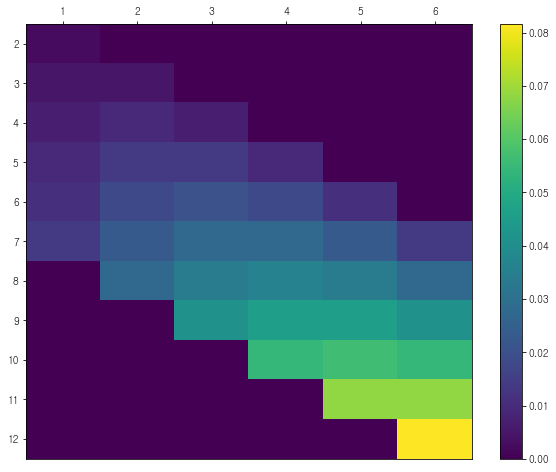

In [124]:
prob =np.array([[f_XY(x_i,y_j) for y_j in y_set]for x_i in x_set])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1,7), minor=False)
ax.set_yticklabels(np.arange(2,13), minor=False)
# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다.
ax.invert_yaxis()
# x축 눈금을 그래프 위쪽에 표시

ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [125]:
np.all(prob >= 0)

True

In [126]:
np.sum(prob)

1.000

In [127]:
# 주변확률분포
def f_X(x):
    return np.sum([f_XY(x,y_k) for y_k in y_set])

In [128]:
def f_Y(y):
    return np.sum([f_XY(x_k,y) for x_k in x_set])

In [129]:
X = [x_set, f_X]
Y = [y_set, f_Y]

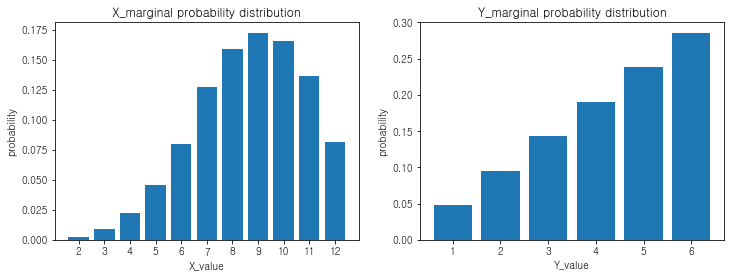

In [130]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

In [131]:
# 2차원 이산형 확률변수의 지표
# 기댓값

np.sum([x_i*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

8.667

In [132]:
# 기댓값 함수

def E1(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i,y_j)*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [133]:
mean_X = E1(XY, lambda x, y :x)
mean_X

8.667

In [134]:
mean_Y = E1(XY, lambda x, y :y)
mean_Y

4.333

In [135]:
a, b = 2, 3

In [139]:
E1(XY, lambda x,y:a*x+b*y)

30.333

In [140]:
a*mean_X + b*mean_Y

30.333

In [141]:
# 분산

np.sum([(x_i - mean_X)**2 * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

4.444

In [147]:
def V2(XY, g):
    x_set,y_set,f_XY = XY
    mean = E1(XY, g)
    return np.sum([(g(x_i, y_j) - mean)**2 * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [148]:
var_X = V2(XY,g = lambda x,y:x)
var_X

4.444

In [149]:
var_Y = V2(XY,g = lambda x,y:y)
var_Y

2.222

In [160]:
# 공분산

def Cov1(XY):
    x_set,y_set,f_XY = XY
    mean_X = E1(XY, lambda x,y:x)
    mean_Y = E1(XY, lambda x,y:y)
    return np.sum([(x_i - mean_X)*(y_j - mean_Y)*f_XY(x_i,y_j)
                  for x_i in x_set for y_j in y_set])

In [161]:
cov_xy = Cov1(XY)
cov_xy

2.222

In [162]:
V2(XY, lambda x,y:a*x + b*y)

64.444

In [163]:
a**2*var_X + b**2*var_Y + 2*a*b*cov_xy

64.444

In [164]:
# 상관계수
cov_xy/np.sqrt(var_X*var_Y)

0.707

#### 과제0825_2
1차원 이산형 확률변수의 변환 사례를 생성하여 기댓값의 선형성과 분산의 공식을 입증하세요.

#### 과제0825_3
2차원 이산형 확률변수의 변환 사례를 생성하여 기댓값의 선형성, 분산과 공분산의 공식을 입증하세요.`

In [ ]:
# 대표적인 이산형 확률분포

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [233]:
linestyles = ['-', '--', ':']

# assert : 조건을 확신한다.

def E(X, g=lambda x:x):
    x_set, f = X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])

def V(X, g=lambda x:x):
    x_set,f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2*f(x_k) for x_k in x_set])

def check_prob(X): # 확률변수를 인수로 가지며 기댓값과 분산 계산 결과를 반환
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')
    
def plot_prob(X): # 확률변수를 인수로 가지며 그 확률변수의 확률함수와 기댓값을 그리기 위한 함수
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', color = 'gray')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()


In [234]:
E(X)

0.300

In [235]:
V(X)

0.210

#### 베르누이 분포
- 가장 기본적인 이산형 확률분포로 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포이다.
- 베르누이 분포를 따르는 확률변수의 시행을 베르누이 시행이라하며 1이 나오면 성공 0이 나오면 실패라고 함
- 동전을 던져 앞면이 나올 확률, 주사위를 한 번 굴려 6이 나오지 않을 확률

In [236]:
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x*(1-p)**(1-x)
        else:
            return 0
    return x_set, f

In [268]:
p = 0.3
X = Bern(p)

In [269]:
check_prob(X)

expected value 0.3
variance 0.21


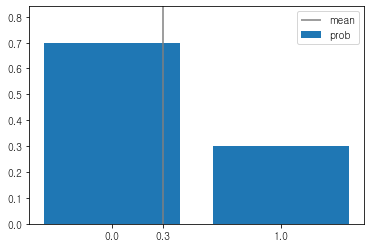

In [270]:
plot_prob(X)

#### 과제_0826_1
p150 ~ 152 코드 풀어보세요.

In [271]:
# scipy.stats에 베르누이 분포를 따르는 확률변수를 생성할 수 있는 bernoulli 함수가 있음
# 인수로 p를 취함, 베르누이에 따르는 rv_frozen object 반환
rv = stats.bernoulli(p)

In [272]:
# pmf 메서드는 확률함수를 계산함, 0,1을 각각 넘겨주면 그 값을 취하는 확률 반환
rv.pmf(0), rv.pmf(1)

(0.700, 0.300)

In [273]:
# pmf메서드는 인수로 리스트를 넘길 수 있다. 리스트 각 요소에 대힌 확률이 저장된 배열이 반환

rv.pmf([0,1])

array([0.7, 0.3])

In [274]:
# cdf 메서드는 누적밀도함수 계산
rv.cdf([0,1])

array([0.7, 1. ])

In [275]:
# 기댓값, 분산
rv.mean(), rv.var()

(0.300, 0.210)

#### 이항분포
- 성공 확률이 p인 베르누이 시행을 n번 했을 때의 성공 횟수가 따르는 분포  
f(x) = $_{n}\mathrm{C}_{x}p^x(1-p)^{n-x}$ $(x \in \{0,1,..,n\}$)
       
       0                     (otherwise)


In [276]:
from scipy.special import comb

def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x)*p**x*(1-p)**(n-x)
        else:
            return 0
    return x_set,f

In [277]:
# 동전을 10번 던져 앞면이 3번 나오는 확률의 이항분포

n = 10
p = 0.3

x=Bin(n,p)

In [278]:
check_prob(x)

expected value 3.0
variance 2.1


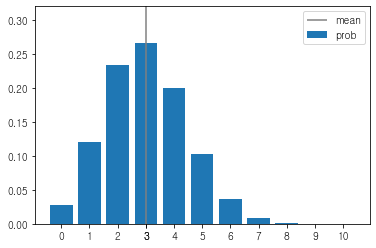

In [279]:
plot_prob(x)

#### 과제_0826-2
p156~158 코드문제를 풀어보세요.

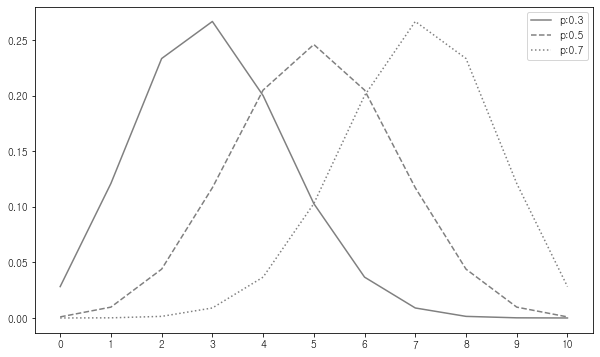

In [280]:
# scipy.stats binom함수, 이항분포 확률변수를 생성

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3,0.5,0.7], linestyles):
    rv = stats.binom(n,p)
    ax.plot(x_set, rv.pmf(x_set), label=f'p:{p}', ls=ls, color = 'gray')
ax.set_xticks(x_set)
ax.legend()
plt.show()

#### 기하분포

- 베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 따르는 분포
- 기하분포의 파라미터는 베르누이 시행의 성공 확률 파라미터 p가 되며 파라미터 p의 기하분포를 Ge(p)로 표기  

f(x) = $(1-p)^{x-1}p$ $(x \in \{0,1,2,3,..\})$

       0              (otherwise) 
       
- 기하분포의 기댓값과 분산 : E(X) = 1/p, V(X) = (1-p)/$p^2$


In [283]:
def Ge(p):
    x_set = np.arange(1, 30)
    def f(x):
        if x in x_set:
            return p*(1-p)**(x-1)
        else:
            return 0
    return x_set, f


In [284]:
p = 0.5
X = Ge(p)

In [285]:
check_prob(X)

expected value 2.0
variance 2.0


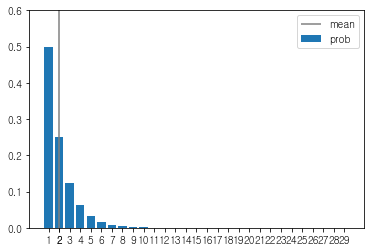

In [286]:
plot_prob(X)

#### 과제 0826_3
p162~163 코드 풀이

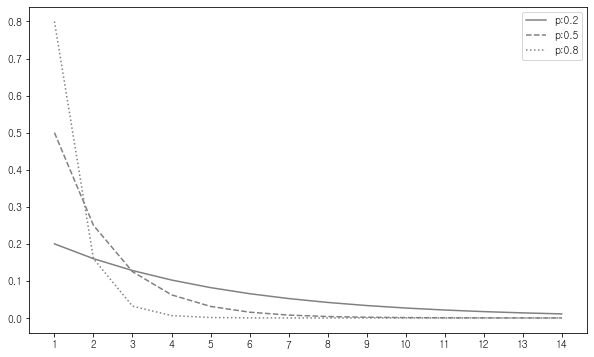

In [287]:
# scipy.stats의 geom함수, 기하분포 생성
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

x_set = np.arange(1, 15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set), label=f'p:{p}', ls=ls, color = 'gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

#### 포아송분포
- 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포이며 포아송 분포의 파라미터는 $\lambda$로 나타낸다.
- 하루에 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생 건수는 Poi(2)를 따른다.  
P(X=0) = 2!/0! * $e^{-2}$ = 0.135

- 포아송 분포의 기댓값과 분산을 모두 $\lambda$ 가 된다.

f(x) = $\lambda^x/x!*e^{-\lambda}$ $(x \in \{0,1,2,...\})$

       0               (otherwise)


In [456]:
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam,x)/factorial(x)*np.exp(-lam)
        else:
            return 0
    return x_set, f

In [460]:
lam = 5
X = Poi(lam)

In [461]:
check_prob(X)

AssertionError: minus probability

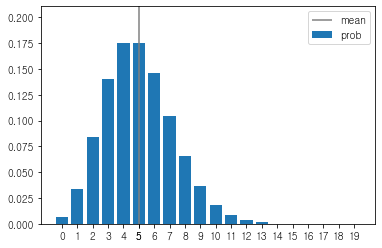

In [462]:
plot_prob(X)

#### 과제 0826-4
p 167~169 코드 풀이

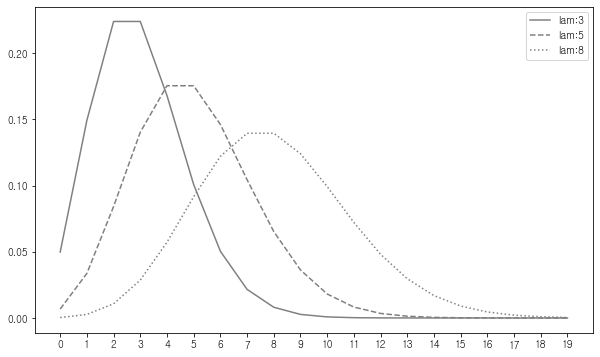

In [463]:
#scipy.stats poisson 함수로 포아송 분포 생성

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam,ls in zip([3,5,8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
           label = f'lam:{lam}', ls=ls, color = 'gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

#### 과제 0826_5
베르누이분포, 이항분포, 기하분포, 포아송분포의 사례를 생성하여 각각의 경우에 대한 기댓값과 분산을 산출하세요.

In [291]:
# 베르누이 분포 사례
# 남녀 뽑기, 남녀 성비가 4:6인 경우 여자를 뽑을 확률

def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x*(1-p)**(1-x)
        else:
            return 0
    return x_set, f

In [294]:
p = 0.6
X = Bern(p)

In [295]:
check_prob(X)

expected value 0.6
variance 0.24


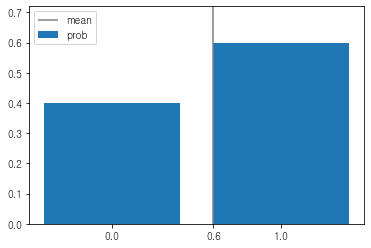

In [296]:
plot_prob(X)

In [307]:
# 이항분포 사례
# 남녀 뽑기, 성비가 4:6이고 15번 뽑기를 진행하는데 여자가 뽑힐 확률

from scipy.special import comb

def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x)*p**x*(1-p)**(n-x)
        else:
            return 0
    return x_set,f

In [308]:
p = 0.6
X = Bin(15, p)

check_prob(X)

expected value 9.0
variance 3.6


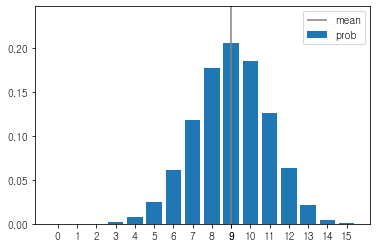

In [309]:
plot_prob(X)

In [ ]:
# 기하분포 사례

In [317]:
# 남녀를 뽑는데 성비 4:6 여자가 나올 때까지 뽑았을 때, 확률 분포

def Ge(p):
    x_set = np.arange(1, 100)
    def f(x):
        if x in x_set:
            return p*(1-p)**(x-1)
        else:
            return 0
    return x_set, f


In [318]:
p = 0.6
X=Ge(p)

In [319]:
check_prob(X)

expected value 1.667
variance 1.111


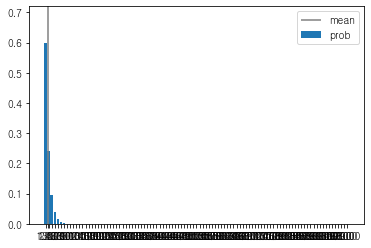

In [320]:
plot_prob(X)

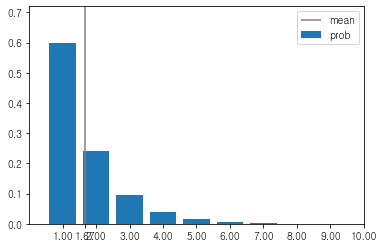

In [316]:
x_set, f = X
prob = np.array([f(x_k) for x_k in x_set])

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.bar(x_set, prob, label='prob')
ax.vlines(E(X), 0, 1, label='mean', color = 'gray')
ax.set_xticks(np.append(x_set, E(X)))
ax.set_ylim(0, prob.max()*1.2)
ax.set_xlim(0, 10)
ax.legend()

plt.show()


In [ ]:
# 포아송분포 사례

In [121]:
# 100만 유튜버의 영상의 평균 조회수가 1시간 안에 5만회 정도라고 한다. 
# 새로 올릴 영상의 평균 조회수가 1시간 안에 30만회가 될 확률

from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(30)
    def f(x):
        if x in x_set:
            return np.power(lam,x)/factorial(x)*np.exp(-lam)
        else:
            return 0
    return x_set, f

In [122]:
lam = 5
X = Poi(lam)

In [123]:
Poi(lam)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <function __main__.Poi.<locals>.f(x)>)

In [124]:
def E(X, g=lambda x:x):
    x_set, f = X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])

def V(X, g=lambda x:x):
    x_set,f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2*f(x_k) for x_k in x_set])


In [125]:
E(Poi(lam))

4.992

In [126]:
V(Poi(lam))

4.949

In [129]:
plot_prob(X)

NameError: name 'plot_prob' is not defined

# 연속형 확률변수
이산형 확률변수와 연속형 확률변수의 주된 차이는 확률변수가 취할 수 있는 값이 이산적인가 연속적인가이다. 연속형 확률변수의 경우 계산 과정에 적분이 포함된다. 적분은 SciPy의 integral 모듈을 사용하여 구현함

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%precision 3
pd.set_option('display.precision', 3)
np.set_printoptions(precision=3)
%matplotlib inline
# 적분
from scipy import integrate
import warnings
# 적분에 관한 warning을 출력하지 않도록 한다
warnings.filterwarnings('ignore')
                        # category=integrate.IntegrationWarning
                        

## 미적분 관계

- 총효용과 한계효용간의 관계를 미적분으로 설명할 수 있다.
- 총효용곡선의 특정 x에 대한 y값은 한계효용곡선의 하방면적과 같고 한계효용곡선의 특정 x에 대한 y값은 총효용곡선의 x에서의 기울기와 같다.

<img src = './KakaoTalk_20220830_085744786.jpg' STYLE='width 100px;'>
<img src = './KakaoTalk_20220830_085746977.jpg' STYLE='width 100px;'>


#### [과제] 0829_1 
p173 ~ 180 예제 풀이

#### [과제] 0829_2
p81 ~ 187 예제 풀이

## 1차원 연속형 확률변수

### 1차원 연속형 확률변수의 정의

In [100]:
x_range = np.array([0, 1])

In [130]:
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0

In [131]:
X = [x_range, f]

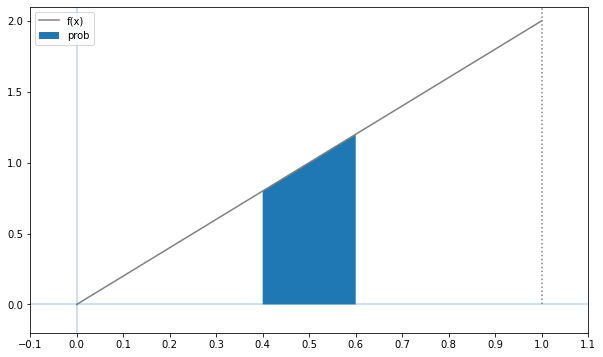

In [132]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# 0.4부터 0.6 까지 x좌표를 준비
xs = np.linspace(0.4, 0.6, 100)
# xs의 범위로 f(x)와 x축으로 둘러싸인 영역을 진하게 칠함
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

In [133]:
# 첫 번째 인수는 피적분함수、두 번째 인수와 세 번째 인수는 적분 범위
integrate.quad(f, 0.4, 0.6)

(0.200, 0.000)

In [134]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
# 함수의 최솟값은 fun이라는 인스턴스 변수에
res.fun

0

In [135]:
integrate.quad(f, -np.inf, np.inf)[0]

1.000

In [136]:
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

In [137]:
F(0.6) - F(0.4)

0.200

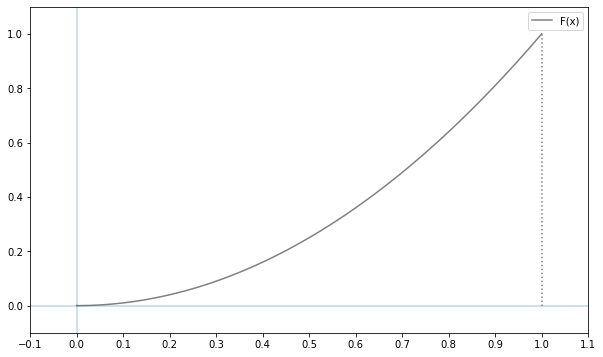

In [138]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

In [139]:
y_range = [3, 5]

def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y - 3) / 2
    else:
        return 0
    
def G(y):
    return integrate.quad(g, -np.inf, y)[0]

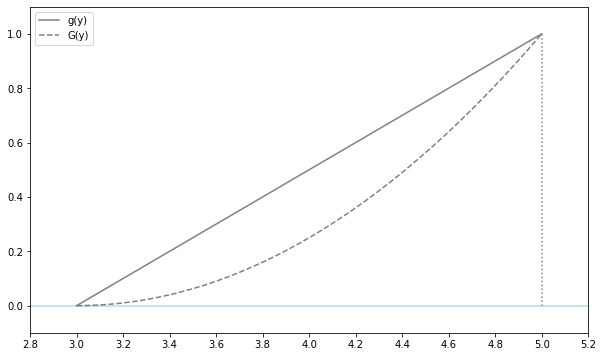

In [140]:
ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(ys, [g(y) for y in ys],
        label='g(y)', color='gray')
ax.plot(ys, [G(y) for y in ys],
        label='G(y)', ls='--', color='gray')
ax.hlines(0, 2.8, 5.2, alpha=0.3)
ax.vlines(ys.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

### 1차원 연속형 확률분포의 지표

#### 평균

In [141]:
def integrand(x):
    return x * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

In [142]:
E(X)

2

In [143]:
E(X, g=lambda x: 2*x+3)

10

In [144]:
2 * E(X) + 3

7

#### 분산

In [145]:
mean = E(X)
def integrand(x):
    return (x - mean) ** 2 * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

1.833

In [146]:
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [147]:
V(X)

1.833

In [148]:
V(X, lambda x: 2*x + 3)

32.333

In [149]:
2**2 * V(X)

7.333

## 2차원 연속형 확률분포

### ２차원 연속형 확률변수의 정의

In [150]:
x_range = [0, 2]
y_range = [0, 1]

In [151]:
def f_xy(x, y):
    if 0 <= y <= 1 and 0 <= x - y <= 1:
        return 4 * y * (x - y)
    else:
        return 0

In [152]:
XY = [x_range, y_range, f_xy]

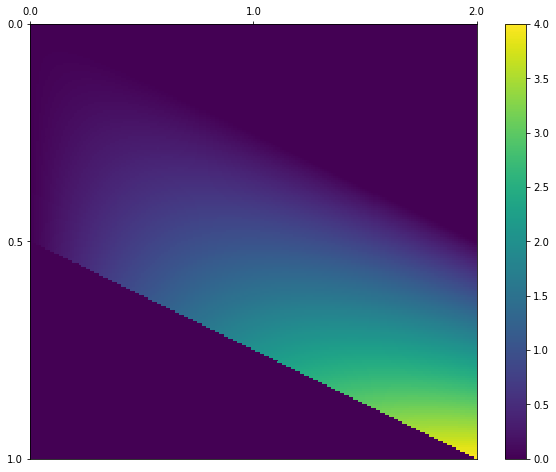

In [153]:
xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array([[f_xy(x, y) for y in ys] for x in xs])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(pd)
ax.set_xticks(np.linspace(0, 200, 3), minor=False)
ax.set_yticks(np.linspace(0, 200, 3), minor=False)
ax.set_xticklabels(np.linspace(0, 2, 3))
ax.set_yticklabels(np.linspace(0, 1, 3))
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [154]:
# 첫 번째 인수는 피적분함수、두 번째 인수는 x의 적분구간과 y의 적분구간
integrate.nquad(f_xy,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0]

1.326

In [155]:
# 주변확률밀도함수
from functools import partial

def f_X(x):
    return integrate.quad(partial(f_xy, x), -np.inf, np.inf)[0]
def f_Y(y):
    return integrate.quad(partial(f_xy, y=y), -np.inf, np.inf)[0]

In [156]:
X = [x_range, f_X]
Y = [y_range, f_Y]

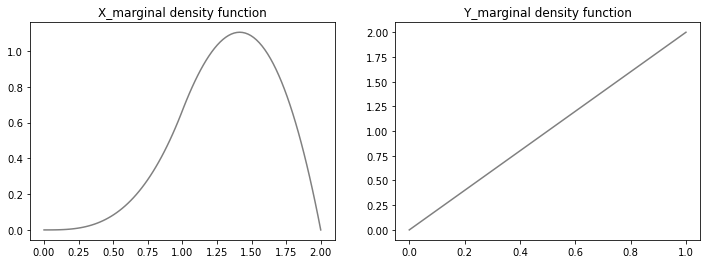

In [157]:
xs = np.linspace(*x_range, 100)
ys = np.linspace(*y_range, 100)

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(xs, [f_X(x) for x in xs], color='gray')
ax2.plot(ys, [f_Y(y) for y in ys], color='gray')
ax1.set_title('X_marginal density function')
ax2.set_title('Y_marginal density function')

plt.show()

### ２차원 연속형 확률변수의 지표

#### 기댓값

In [158]:
def integrand(x, y):
    return x * f_xy(x, y)

integrate.nquad(integrand,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0]

0.863

In [159]:
def E(XY, g):
    x_range, y_range, f_xy = XY
    def integrand(x, y):
        return g(x, y) * f_xy(x, y)
    
    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0]

In [160]:
mean_X = E(XY, lambda x, y: x)
mean_X

0.863

In [161]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

0.000

In [162]:
a, b = 2, 3

In [163]:
E(XY, lambda x, y: a*x + b*y)

4.749

In [164]:
a * mean_X + b * mean_Y

1.727

#### 분산

In [165]:
def integrand(x, y):
    return (x - mean_X)**2 * f_xy(x, y)

integrate.nquad(integrand,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0]

0.006

In [166]:
def V(XY, g):
    x_range, y_range, f_xy = XY
    mean = E(XY, g)
    def integrand(x, y):
        return (g(x, y) - mean)**2 * f_xy(x, y)

    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0]

In [167]:
var_X = V(XY, lambda x, y: x)
var_X

0.006

In [168]:
var_Y = V(XY, lambda x, y: y)
var_Y

1.689

In [68]:
def Cov(XY):
    x_range, y_range, f_xy = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    def integrand(x, y):
        return (x-mean_X) * (y-mean_Y) * f_xy(x, y)

    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0]

In [69]:
cov_xy = Cov(XY)
cov_xy

-0.000

In [70]:
V(XY, lambda x, y: a*x + b*y)

0.824

In [71]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

15.223

In [72]:
cov_xy / np.sqrt(var_X * var_Y)

-0.001

#### 과제0829_4
미적분관계 설명

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [14]:
linestyles = ['-', '--', ':']

# assert : 조건을 확신한다.

def E(X, g=lambda x:x):
    x_range, f=X
    def integrand(x):
        return g(x)*f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x:x):
    x_range, f= X
    mean = E(X, g)
    def integrand(x):
        return (g(x)-mean)**2 *f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

# 적분값과 추정 오차를 반환하는 함수(피적분함수, 적분 범위)
def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected vaue {E(X):.3f}')
    print(f'variance {V(X):.3f}')
    
def plot_prob(X, x_min, x_max):  # 확률변수와 구간을 인수로 취하고 그 확률변수의 밀도함수와 분포함수를 그리는 함수
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label='F(x)', ls='--', color='gray')

    ax.legend()
    plt.show()


## 정규분포
- 통계분석에서 자주 사용되는 중요한 확률분포로 자연계에서 일어나는 수많은 현상을 표현. 가우스 분포라고도 부름
- 정규분포가 취할 수 있는 값은 실수 전체로 파라미터는 $평균(\mu)과 분산(\sigma^2)$ 두가지이다. $N(\mu,\sigma^2)$으로 표기

- 정규분포의 밀도 함수
<img src = './정규분포.jpg' STYLE='width 200px;'>


- Numpy의 numpy.exp() 함수는 밑이 자연상수 e인 지수함수(e^x)로 변환
- 자연상수(natural constant) e는 2.718281828459045… 이란 숫자입니다. 파이(π)처럼 소수점 아래에 끝이 없는 무리수
- 자연 로그(natural logarithm)의 라틴 이름은 logarithm naturali 인데요, 이를 줄여서 ln이라고 합니다. 자연로그는 자연 상수 e를 밑(base)으로 하는 로그(log)입니다.
- 자연 상수 e는 어떤 대상이 얼마 만큼 성장했는지를 알려 주는 수라면, 자연로그는 그 성장을 이루기 위해 얼마의 시간(또는 기간)이 필요한 지를 계산하는 것이라고 볼 수 있습니다.
- 자연 상수 e의 의미와 자연 상수 e와 자연 로그의 관계를 이해하면, 자연 로그 값이 왜 성장을 달성하기 위한 시간(기간)을 알려 주는 지 이유를 알 수 있는데요


In [171]:
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1/np.sqrt(2*np.pi * sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))
    return x_range,f


In [172]:
mu, sigma = 2, 0.5
X = N(mu,sigma)

In [173]:
check_prob(X)

expected vaue 2.000
variance 0.250


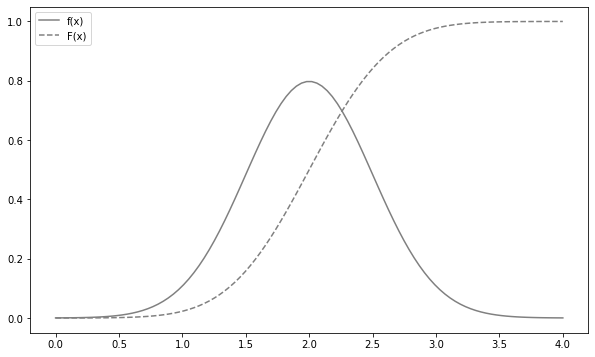

In [174]:
plot_prob(X, 0, 4)

In [ ]:
#scipy.stats.norm은 가우시안 정규분포 객체를 생성하는 메서드

In [175]:
rv = stats.norm(2, 0.5)

In [176]:
rv.mean(), rv.var()

(2.000, 0.250)

In [178]:
# 밀도함수 계산, 정규분포 상 2일 때 대응되는 y의 값을 구하는 것.
rv.pdf(2)

0.798

In [179]:
# 분포함수 계산
rv.cdf(1.7)

0.274

In [181]:
# isf : 생존함수의 역함수(inverse survival function), 상위 30% 점
rv.isf(0.5)

2.000

In [182]:
# interval : 확률이 알파가 되는 가운데 부분의 구간을 구할 수 있다.(90% 구간)
rv.interval(0.9)

(1.178, 2.822)

In [183]:
rv.isf(0.95), rv.isf(0.05)

(1.178, 2.822)

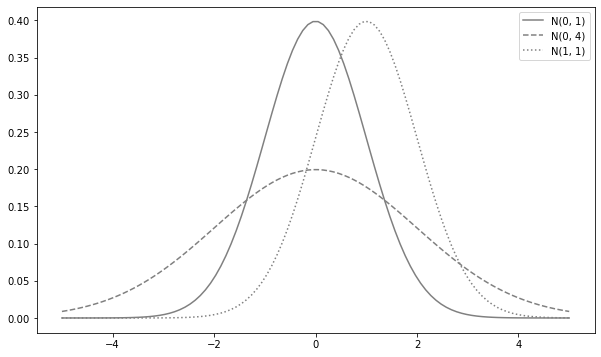

In [184]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]  # 세가지 파라미터
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label=f'N({mu}, {sigma**2})', ls=ls, color='gray')
ax.legend()

plt.show()


In [187]:
# loc = 평균, scale = 표준편차
stats.norm.pdf(loc=0, scale = 1, x = 0)

0.399

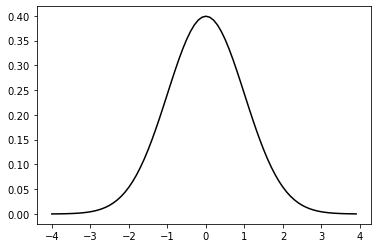

In [191]:
x_plot = np.arange(-4, 4, 0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=0, scale = 1), color = 'black')

In [ ]:
# x : 1~7.1, 평균 4, 표준편차 0.8, 정규분포 곡선 출력

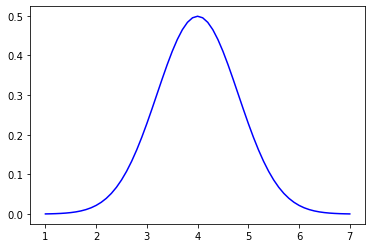

In [194]:
x_plot = np.arange(1, 7.1, 0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=4, scale = 0.8), color = 'blue')

In [196]:
# 확률변수가 4일 때의 확률밀도
norm_dist = stats.norm(loc=4, scale = 0.8)
norm_dist.pdf(x=4)

0.499

In [197]:
# 누적분포함수
stats.norm.cdf(loc=4, scale = 0.8, x = 7)


1.000

#### 과제_0830_2
- 상기 누적분포함수를 그래프로 출력하세요.
- 확률변수가 4일때 누적분포값(확률)
- 확률이 0.5일 때, 확률변수를 구하세요.

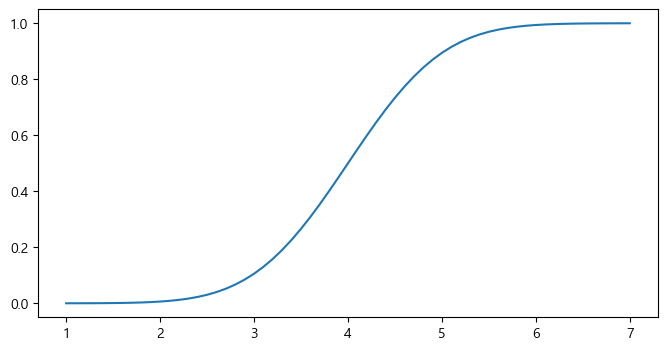

In [248]:
fig = plt.figure(figsize=(8, 4))  
ax1 = fig.add_subplot(111)

rv = stats.norm(4, 0.8)
xx = np.arange(1, 7.1, 0.1)
y1 = rv.cdf(xx)

plt.plot(xx, y1)

In [267]:
rv.cdf(4)

0.500

In [270]:
rv.isf(0.5)

4.000

#### 확률분포함수

- pmf 확률질량함수(probability mass function)
- pdf 확률밀도함수(probability density function)
- cdf 누적분포함수(cumulative distribution function)
- ppf 누적분포함수의 역함수(inverse cumulative distribution function)
- sf 생존함수(survival function) = 1 - 누적분포함수
- isf 생존함수의 역함수(inverse survival function)
- rvs 랜덤 표본 생성(random variable sampling)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
|

Text(0.5, 1.0, '확률밀도함수와 누적분포함수')

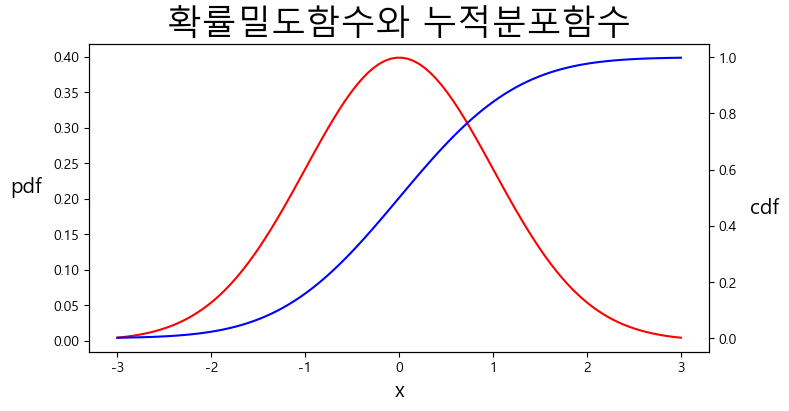

In [4]:
from matplotlib import rc
plt.style.use('default')
rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(8, 4))  
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
rv = stats.norm(0, 1)
xx = np.linspace(-3,3,100)
y1 =rv.pdf(xx)
y2 =rv.cdf(xx)
        # 플롯 사이즈 지정
ax1.plot(xx, y1, color="red")         # 선을 빨강색으로 지정하여 plot 작성  
ax2.plot(xx, y2, color='blue')
ax1.set_xlabel("x",fontsize=15)                      # x축 레이블 지정
ax1.set_ylabel("pdf",rotation=0, fontsize=15,labelpad=20) 
ax2.set_ylabel("cdf",rotation=0, fontsize=15,labelpad=20) # y축 레이블 지정
                         # 플롯에 격자 보이기
# ax1.legend(loc='center left')              # 범례 표시
# ax2.legend(loc='center right') 
plt.title('확률밀도함수와 누적분포함수',fontsize=25)


In [5]:
rv.cdf(0)

0.500

In [6]:
rv.pdf(0)

0.399

In [7]:
# ppf : 누적분포함수의 역함수, 누적분포가 0.5인 x값
rv.ppf(0.5)

0.000

In [8]:
rv.ppf(0.95)

1.645

In [9]:
# 0~1까지 누적확률분포
rv.cdf(1) - rv.cdf(0)

0.341

In [10]:
# (-2 < x < 2) 확률을 구하세요.
rv.cdf(2) - rv.cdf(-2)

0.954

#### 과제_0830-3
- 상위 5% 확률의 확률변수를 구하세요.
- 하위 5% 확률의 확률변수를 구하세요.

In [11]:
# 상위 5% 확률의 확률변수
stats.norm.isf(0.05, 0, 1)

1.645

In [239]:
# 하위 5% 확률의 확률변수
rv.isf(0.95)

-1.645

#### 과제-0830-4
1. 어느 회사에서 종업원들의 근무기간을 조사하였는데, 종업원들의 근무기간은 평균이 11년이고 표준편차가 4년인 정규분포를 따른다고 한다. 그럼 이 회사에서 14년 이상 근무한 종업원의 비율을 구하시오 

2. 어느 전구회사의 전구의 수명은 평균 800일, 표준편차 30일인 정규분포를 따른다. 전구의 수명이 760일 이하일 확률 구하시오 

3. 어느 고등학교 3학년 학생들의 수학 성적은 평균이 70점이고 분산이 64점인 정규분포를 따른다고 한다. 그럼 점수가 80점 이상이고 90점 이하일 확률을 구하시오


In [271]:
rr = stats.norm(loc = 11, scale = 4)
rr.sf(14)
# 1-rr.cdf(14)

0.227

In [222]:
stats.norm.cdf(loc = 800, scale = 30, x = 760)

0.091

In [246]:
rv=stats.norm(loc = 70, scale = 8)
rv.cdf(90) - rv.cdf(80)

0.099

## 지수분포
- 어떤 사건이 발생하는 간격이 따르는 분포이며 확률변수가 취할 수 있는 값은 0이상의 실수
- 지수분포의 파라미터는 $\lambda$로 양의 실수이며 지수분포를 Ex($\lambda$)로 표기한다.
- Ex($\lambda$)는 단위시간당 평균 $\lambda$번 발생하는 사건의 발생 간격을 따르는 확률분포이다.
- 지수분포의 밀도함수 :

$$f(x) = {\lambda}e^{{-\lambda}x} (x \ge 0)$$

                                         0        (otherwise)


In [25]:
import numpy as np
def Ex(lam):
    x_range = [0, np.inf]
    def f(x):
        if x >= 0:
            return lam*np.exp(-lam*x)
        else:
            return 0
    return x_range, f
            

In [31]:
lam = 2
X = Ex(lam)
X

([0, inf], <function __main__.Ex.<locals>.f(x)>)

In [32]:
check_prob(X)

expected vaue 0.500
variance 0.250


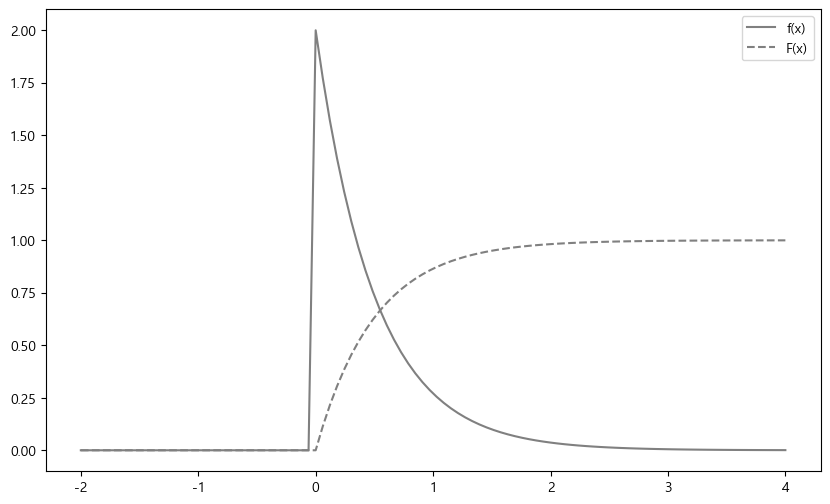

In [33]:
plot_prob(X, -2,4)

In [34]:
lam = 3
X = Ex(lam)
X

([0, inf], <function __main__.Ex.<locals>.f(x)>)

#### 과제 0831_1
상기 지수분포에서 lambda를 1, 2, 3으로 변환 시켰을 때, 그래프의 변화 모습을 출력하고 의미를 설명하세요.

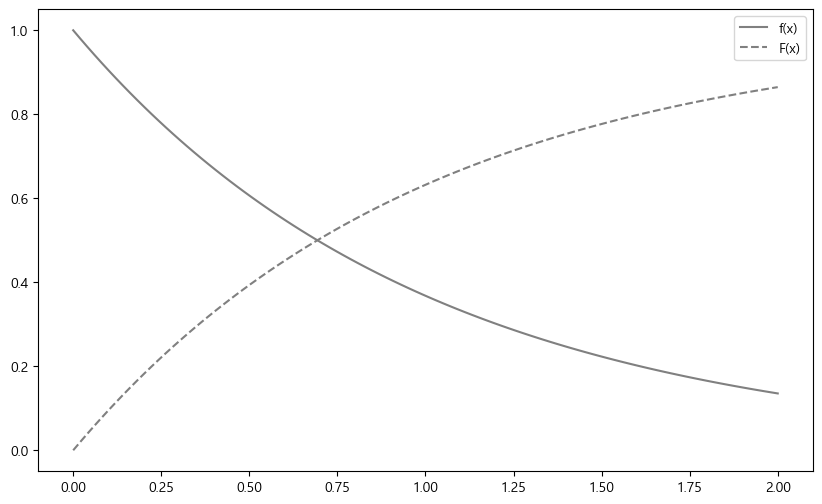

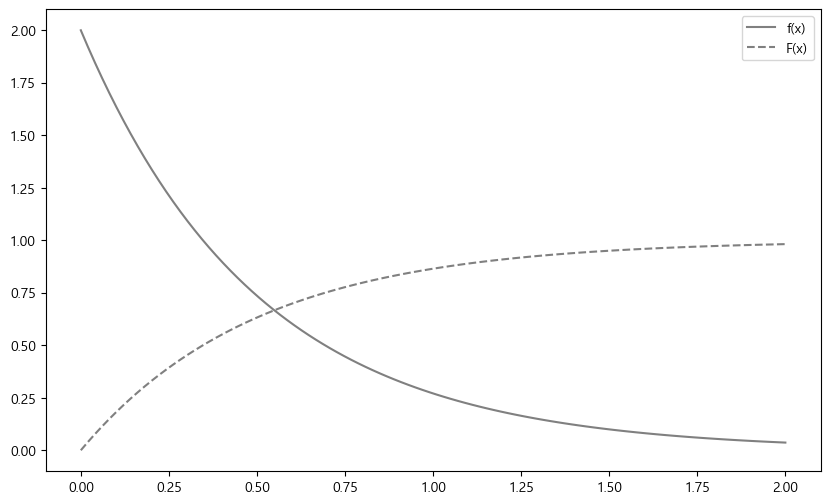

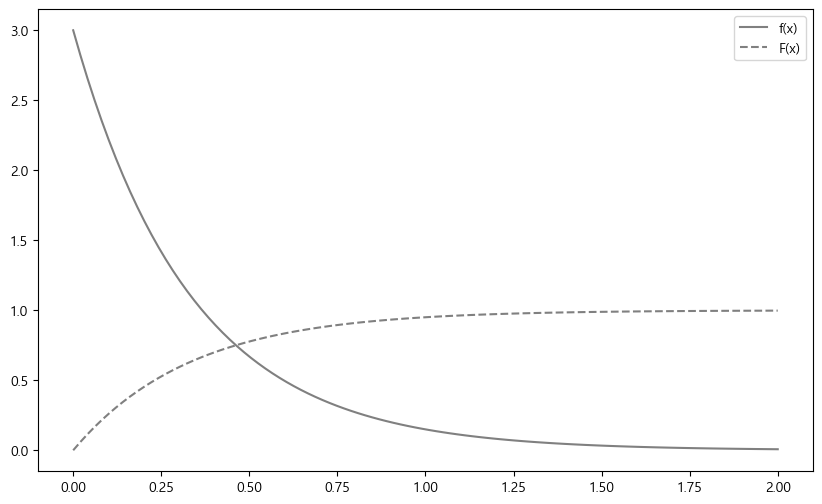

In [44]:
ax1 = fig.add_subplot(111)
for i in [1, 2, 3]:
    lam = i
    X = Ex(lam)
    plot_prob(X, 0,2)

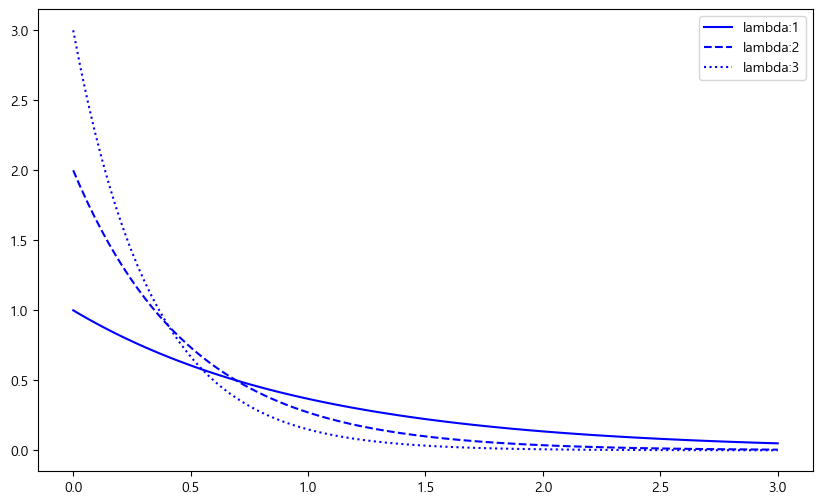

In [45]:
# lambda 1,2,3
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 3, 100)
for lam, ls in zip([1, 2, 3], linestyles):
    rv = stats.expon(scale=1/lam)
    ax.plot(xs, rv.pdf(xs),
            label=f'lambda:{lam}', ls=ls, color='blue')
ax.legend()

plt.show()

# 지수분포의 람다 값이 달라지면 결과 값인 간격에 대한 그래프의 기울기가 값이 올라갈수록 가파르고 
# 사건 발생 간격의 등락이 커진다.

## 카이제곱분포
- 좌우비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어진다.
- 자유도가 커지면 좌우대칭에 가까워진다.
- 자유도의 값 가까이에 분포의 정점이 있다.
- 서로 독립인 복수의 표준정규분포에 의해 정의된다.

In [46]:
n = 10
rv = stats.norm()
sample_size = int(1e6)
# 표준정규분포에서 표본 크기 100만으로 무작위추출한다.
Zs_sample = rv.rvs((n, sample_size))
# axis = 0에서 총합을 구하고, 표준정규분포의 제곱합 표본 데이터를 구한다.
chi2_sample = np.sum(Zs_sample**2, axis = 0)

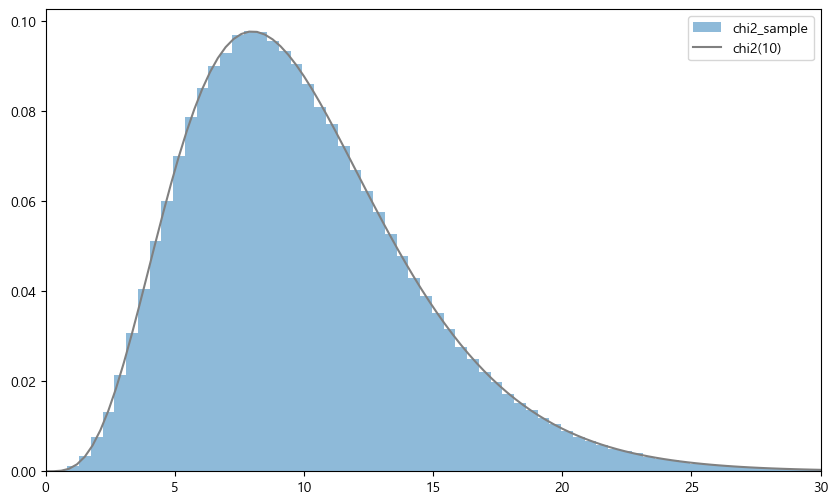

In [50]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0,30,100)
ax.hist(chi2_sample, bins = 100, density=True, alpha = 0.5, label = 'chi2_sample')
ax.plot(xs, rv_true.pdf(xs), label=f'chi2({n})', color = 'gray')

ax.legend()
ax.set_xlim(0,30)
plt.show()

#### 과제_0831_2
p219~223 예제코드로 작성하세요.

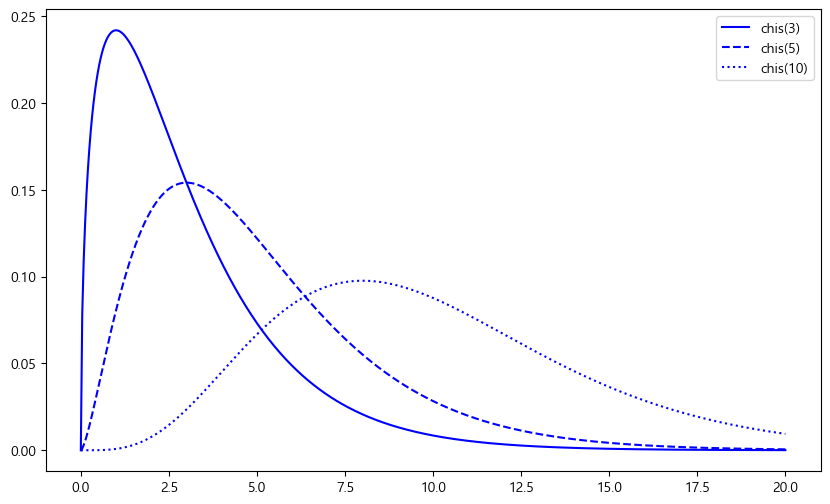

In [53]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,20,500)
for n,ls in zip([3,5,10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs), label = f'chis({n})', ls = ls, color = 'blue')

ax.legend()
plt.show()

In [67]:
# 상위 100a%점, 카이제곱 알파 (n), isf메서드 사용
rv = stats.chi2(5)
rv.isf(0.05)

11.070

## t분포
- 정규분포에서 모평균의 구간추정 등에 사용되는 확률분포
- 확률변수 Z, Y는 서로 독립이고 Z는 표준정규분포 N(0,1)을 Y는 자유도가 n인 카이제곱분포 $\chi^2(n)$을 각각 따를 때 t = ${Z} \over{\sqrt{{Y}\over{n}}}$ 의 확률분포를 자유도가 n인 t분포라고 한다.
- t분포의 의미
  * 모분산을 모르는 상황에서도 표본평균의 분포에 대하여 애기할 수 있다.
  * t분포를 만들 때 표본에서 계산한 표준오차로 표본평균을 표준화함
  * 표본에서 계산한 표준오차로 표본평균을 표준화했을 경우의 결과가 t분포를 따른다는 사실을 이용하면 얻어낸 표본평균에 관한 불확실성을 짐작할 수 있다.
- t분포의 특성
  * t분포는 모집단이 정규분포이더라도 분산 $\sigma^2$이 알려져 있지 않고 표본의 수가 적은 경우에 평균 $\mu$에 대한 신뢰구간 추정 및 가설검정에 아주 유용하게 쓰이는 분포이다.
  * t분포는 표준정규분포처럼 0을 중심으로 종형의 모습을 가진 대칭 분포이다.
  * t분포는 꼬리는 표준정규분포 보다 두껍다(fat tail)
  * t분포는 자유도 n에 따라 모습이 변하는데 자유도 n이 커짐에 따라 표준정규분포 N(0,1)에 수렴한다. 통상 모집단의 분산이 알려져 있지 않은 경우, 표분분포를 결정할 때 표본의 크기가 30 이하이면 t분포를, 그 크기가 30 이상이면 표준정규분포를 이용


#### 과제_0831_3
p224~228 예제코드로 작성하세요.

In [58]:
n =10
rv1 = stats.norm()
rv2 = stats.chi2(n)

sample_size = int(1e6)
Z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = Z_sample/np.sqrt(chi2_sample/n)

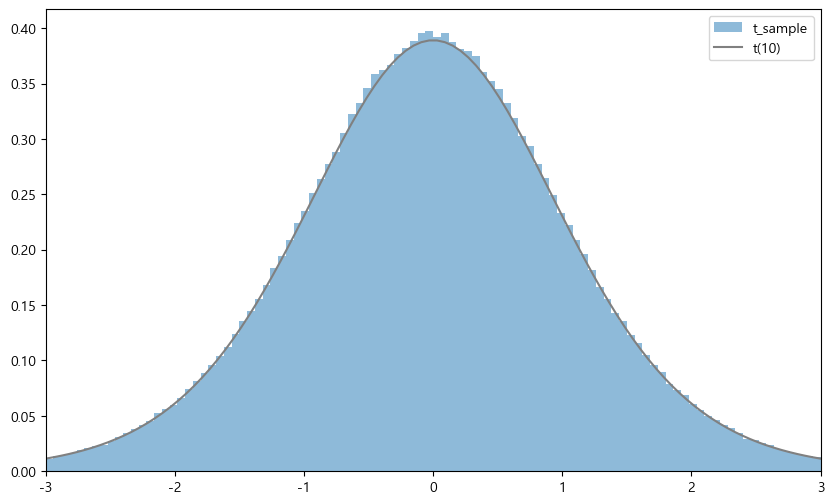

In [60]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

rv = stats.t(n)
xs = np.linspace(-3, 3, 100)
ax.hist(t_sample, bins = 100, range=(-3,3), density=True, alpha=0.5, label='t_sample')
ax.plot(xs, rv.pdf(xs), label=f't({n})', color='gray')

ax.legend()
ax.set_xlim(-3,3)
plt.show()

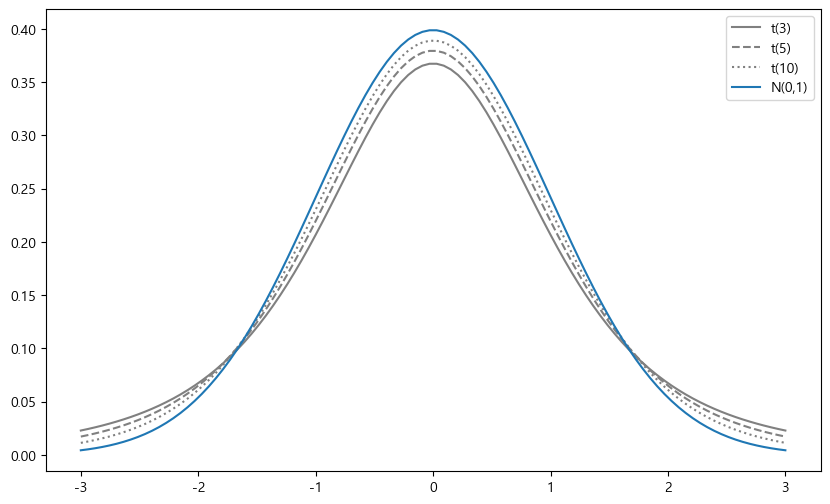

In [61]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

xs = np.linspace(-3, 3, 100)
for n, ls in zip([3,5,10], linestyles):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs), label = f't({n})', ls=ls, color='gray')
rv = stats.norm()
ax.plot(xs, rv.pdf(xs), label='N(0,1)')

ax.legend()
plt.show()

In [68]:
rv = stats.t(5)
rv.isf(0.05)

2.015

## F분포
- 확률변수 $Y_1, Y_2는 서로 독립이고 각각 Y_1$ ~ ${\chi}^2(n_1), Y_2$ ~ ${{\chi}^2(n_2)}$를 따를 때,
F = ${Y_1/n_1}\over{Y_2/n_2} $의 확률분포를 자유도 $n_1,n_2$인 F분포 F$(n_1,n_2)$라고 한다.
- 좌우 비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어지는 분포이다.
- F분포가 취할 수 있는 값은 0 이상인 실수이며 분포의 정점은 1에 가깝다.


In [70]:
n1 =5
n2 = 10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

sample_size = int(1e6)
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1)/(sample2/n2)

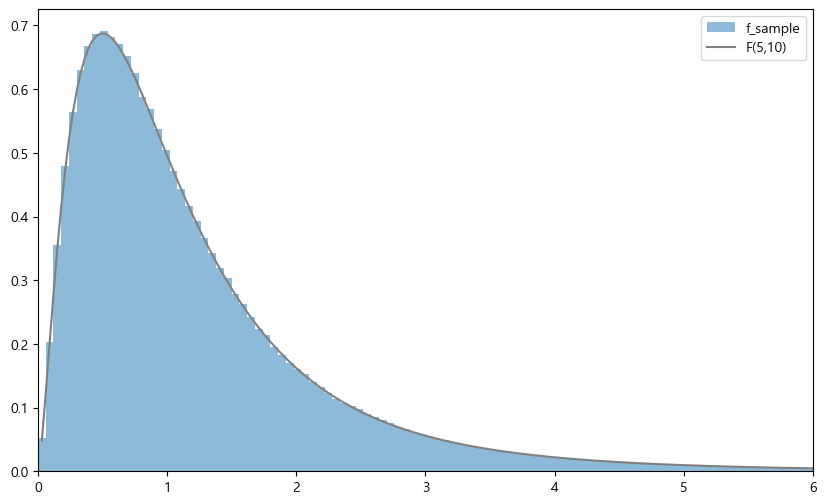

In [71]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

rv = stats.f(n1, n2)
xs = np.linspace(0,6,200)[1:]
ax.hist(f_sample, bins=100, range=(0,6), density=True, alpha=0.5, label='f_sample')
ax.plot(xs, rv.pdf(xs), label=f'F({n1},{n2})', color = 'gray')

ax.legend()
ax.set_xlim(0,6)
plt.show()

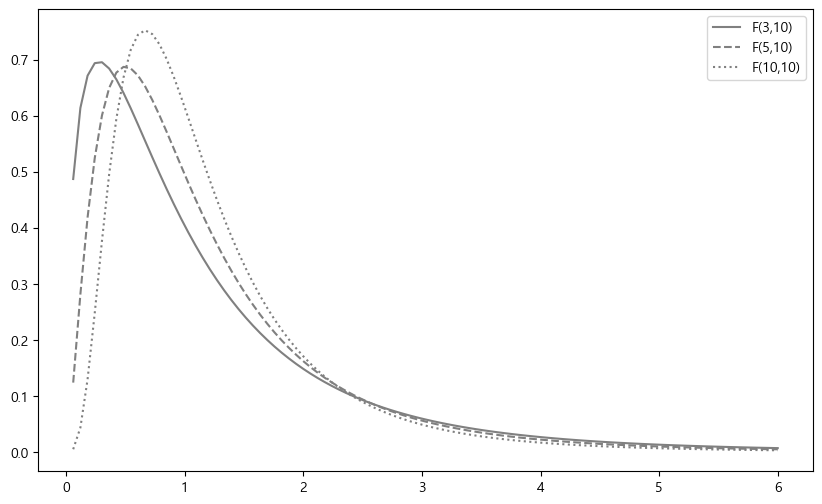

In [66]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 6, 100)[1:]
for n1, ls in zip([3,5,10], linestyles):
    rv = stats.f(n1, 10)
    ax.plot(xs, rv.pdf(xs), label = f'F({n1},10)', ls=ls, color='gray')


ax.legend()
plt.show()

#### 과제_0831_4
p229~232 예제코드로 작성하세요.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
%precision 3
%matplotlib inline

## 독립동일분포
- 확률변수가 서로 독립이라는 것은 확률변수가 다른 확률변수에 영향을 끼치지 않는다는 의미이다.
- 통계분석에서 취급하는 데이터 중 상당수가 독립이면서 다차원인 확률변수의 실현값으로 간주될 수 있다.
- 서로 독립이고 각각 동일한 확률분포를 따르는 다차원 확률변수를 독립동일분포라 한다.


In [5]:
linestyles = ['-', '--', ':', '-.']

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

### 독립성의 정의
- 2개 이상의 확률변수가 서로 영향을 끼치지 않으며 관계가 없음을 나타내는 개념
- 2차원 확률변수 (X,Y)의 경우 다음과 같은 관계가 성립할 때 X,Y는 독립이라고 함.  
$f_{X,Y}(x,y) = f_X(x)f_Y(y)$
- 확률변수가 독립일 때 결합확률은 주변확률의 곱으로 작성할 수 있다.
- 일반화 : $f_{X_1,X_2,...,X_n}(x_1,x_2,..x_n) = f_{X_1}(x_1)f_{X_2}(x_2)···f_{X_n}(x_n)$  
※ 함수 f가 이산형이면 확률함수, 연속형이면 밀도함수를 나타냄


### 독립성과 무상관성
- 공분산이나 상관계수가 0일 때 무상관이라 하고 두 확률변수 사이에는 상관성, 즉 선형 관계가 없음을 나타냄
- 독립성도 무상관성도 두 확률변수가 서로 관계가 없다는 것을 나타내는 성질이다.
 * 무상관성보다 독립성이 더 강한 개념
 * 2개의 확률변수 X와 Y가 독립일 때 X와 Y는 무상관이 되지만 X와 Y가 무상관일 때 X와 Y가 반드시 독립인 것은 아님


In [4]:
# 불공정한 주사위의 예
x_set = np.array([1,2,3,4,5,6])
y_set = np.array([1,2,3,4,5,6])

def f_XY(x,y):
    if x in x_set and y in y_set:
        return x*y/441
    else:
        return 0
XY = [x_set, y_set, f_XY]

In [5]:
# 2차원 확률변수 X와 Y는 독립(독립이면 무상관!)
# 공분산이 0이므로 무상관
Cov(XY)

-0.000

In [6]:
# 무상관인 2개의 확률변수 고려

x_set = np.array([0,1])
y_set = np.array([-1,0,1])

def f_XY(x,y):
    if (x,y) in [(0,0),(1,1),(1,-1)]:
        return 1/3
    else:
        return 0
XY = [x_set,y_set,f_XY]

In [7]:
# X,Y는 무상관이다.
Cov(XY)

0.000

In [8]:
# 독립성을 증명하는 등식이 성립하지 않으므로 독립이 아니다.
# 이는 무상관이라 해서 독립이지는 않다는 것의 증명
f_X(0)*f_Y(0),f_XY(0,0)

(0.111, 0.333)

## 합의 분포
- 서로 독립이고 동일한 확률분포을 따르는 확률변수 $X_1,X_2,···,X_n의 합 \sum_{i=1}^n X_i = X_1 + X_2 + ···+ X_n$이 따르는 확률분포를 의미
- 합의 분포를 이해하면 확률변수의 합을 n으로 나눈 표본평균의 분포도 쉽게 이해할 수 있음
- 확률변수 합의 기댓값 : $E(X_1 + X_2 + ··· + X_n) = E(X_1) + E(X_2) + ··· E(X_n)$ 이 성립
- 확률변수 합의 공식 : $X_1, X_2, ··· ,X_n이 서로 독립이면  V(X_1 + X_2 + ··· + X_n) = V(X_1) + V(X_2) + ··· V(X_n)$이 성립  
결국 합의 분포 분산도 각 확률변수에 대한 분산의 합으로 계산할 수 있다.


In [36]:
# 정규분포 합의 분포
# 서로 독립인 X~N(1,2), Y~N(2,3)이 있을 때, 확률변수 X+Y의 분포는 N(3,5)를 따름

rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

print('평균:', np.mean(X_sample), np.mean(Y_sample), '분산:',np.var(X_sample),np.var(Y_sample),'\n')

print('합의 평균,분산:',np.mean(sum_sample),np.var(sum_sample) )

평균: 1.0014972931187354 2.001501179775127 분산: 1.9947673292920844 2.99421430439824 

합의 평균,분산: 3.0029984728938617 4.99853786684655


In [37]:
rv3=stats.norm(3,np.sqrt(5))
sample = rv3.rvs(sample_size)
print(np.mean(sample))
print(np.var(sample))

2.999408306153103
5.008174617239785


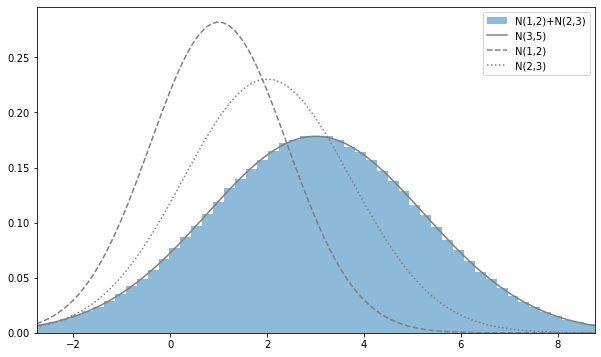

In [38]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

ax.hist(sum_sample, bins = 100, density = True, alpha = 0.5, label = 'N(1,2)+N(2,3)')
ax.plot(xs, rv.pdf(xs), label='N(3,5)', color='gray')
ax.plot(xs, rv1.pdf(xs), label='N(1,2)', ls = '--', color='gray')
ax.plot(xs, rv2.pdf(xs), label='N(2,3)', ls = ':', color = 'gray')

ax.legend()
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
plt.show()
# 히스토그램과 밀도함수가 일치한다. X+Y~N(3,5)를 확인가능

In [ ]:
# 동일한 분포를 따르는 2개의 독립인 확률변수에 대해서, 그 합도 동일한 확률분포가 되는 성질을 '재생성'이라고 한다.
# 모든 확률분포가 재생성을 가지는 것은 아니다.

In [39]:
# 포아송분포의 합의 분포
# 포아송분포도 재생성을 지닌 확률분포
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

print('X, Y의 평균:', np.mean(X_sample), np.mean(Y_sample), 'X,Y의분산:',np.var(X_sample),np.var(Y_sample),'\n')

print('합의 평균,분산:',np.mean(sum_sample),np.var(sum_sample) )

X, Y의 평균: 3.002011 3.999118 X,Y의분산: 3.000324955878998 3.9920892220760003 

합의 평균,분산: 7.001129 6.9910277253589985


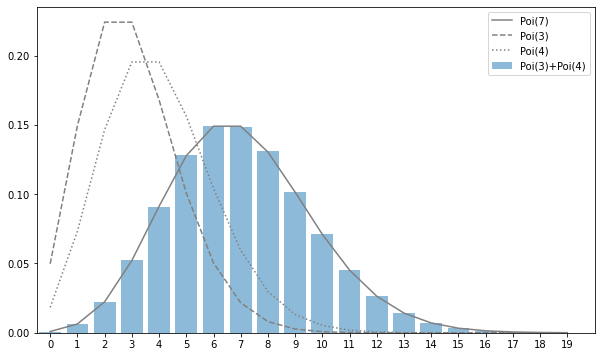

In [41]:
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)
hist,_ = np.histogram(sum_sample, bins=20, range=(0,20), normed = True)

ax.bar(xs, hist, alpha=0.5, label='Poi(3)+Poi(4)')
ax.plot(xs, rv.pmf(xs), label = 'Poi(7)', color='gray')
ax.plot(xs, rv1.pmf(xs), label = 'Poi(3)', ls= '--', color='gray')
ax.plot(xs, rv2.pmf(xs), label='Poi(4)', ls=':', color='gray')

ax.legend()
ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))
plt.show()

In [42]:
# 베르누이 분포의 합의 분포
# 기댓값 p, 분산 p(1-p)
# 베르누이 분포에는 재생성이 없음.
# 베르누이 분포의 합의 분포는 이항분포가 되는 성질이 있다.
p = 0.3
rv = stats.bernoulli(p)

sample_size = int(1e6)
Xs_sample = rv.rvs((10, sample_size))
sum_sample = np.sum(Xs_sample, axis=0)

print('Xs의 평균:', np.mean(Xs_sample), 'Xs의분산:',np.var(Xs_sample),'\n')

print('합의 평균,분산:',np.mean(sum_sample),np.var(sum_sample) )

Xs의 평균: 0.2999597 Xs의분산: 0.20998387837591012 

합의 평균,분산: 2.999597 2.097632837591


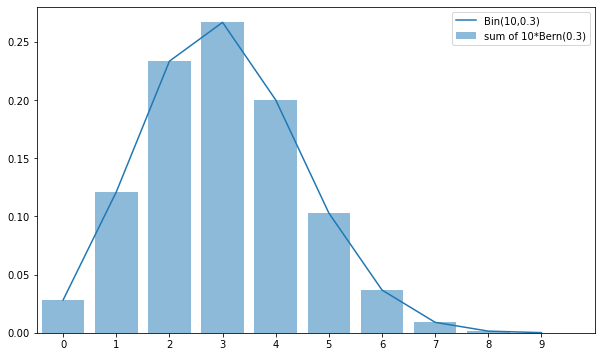

In [43]:
# 베르누이 분포의 합의 분포인 막대그래프의 각 대표값과 이항분포의 선그래프가 만나는 지점을 확인
# 베르누이 분포의 합의 분포는 이항분포가 된다.
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.binom(10,p)
xs=np.arange(10)

hist,_ = np.histogram(sum_sample, bins=10, range=(0,10), normed=True)
ax.bar(xs, hist, alpha=0.5, label='sum of 10*Bern(0.3)')
ax.plot(xs, rv.pmf(xs), label='Bin(10,0.3)')

ax.legend()
ax.set_xlim(-0.5, 10)
ax.set_xticks(np.arange(10))
plt.show()

#### 과제 0901_1
p243~250 예제풀기

## 표본평균의 분포
- 표본평균의 분포란 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_1, X_2, ...,X_n$의 표본평균이 따르는 분포
- 이 분포는 중심극한정리나 대수의 법칙 등 추측통계에서 중요한 성질을 담고 있기 때문에 유의해야 함
- 표본평균의 기댓값과 분산  
$E(\bar{X}) = \mu$  
$V(\bar{X}) = {\sigma}^2 / n$


In [47]:
# 정규분포의 표본평균 분포
# 정규분포의 경우, 표본평균도 정규분포가 된다.
mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))

sample_mean = np.mean(Xs_sample, axis = 0)

np.mean(sample_mean), np.var(sample_mean)

(0.999, 0.199)

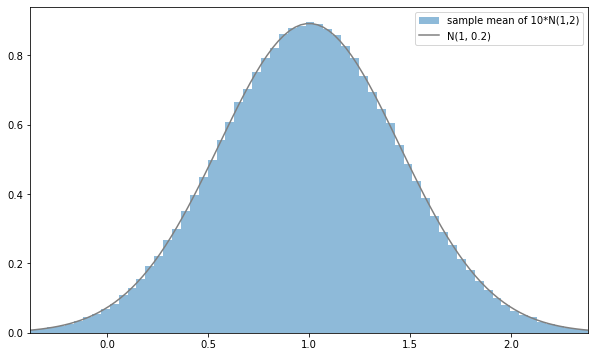

In [48]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv_true = stats.norm(mean, np.sqrt(var/n)) # 정규분포 생성
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)
# 표본분포의 히스토그램
ax.hist(sample_mean, bins=100, density=True, alpha=0.5, label='sample mean of 10*N(1,2)')
# 정규분포의 선그래프
ax.plot(xs, rv_true.pdf(xs), label='N(1, 0.2)', color = 'gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

In [51]:
# 포아송분포의 표본평균 분포
# n=10, X1~X10 ~ Poi(3)

l=3
rv = stats.poisson(l)

n=10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(3.000, 0.299)

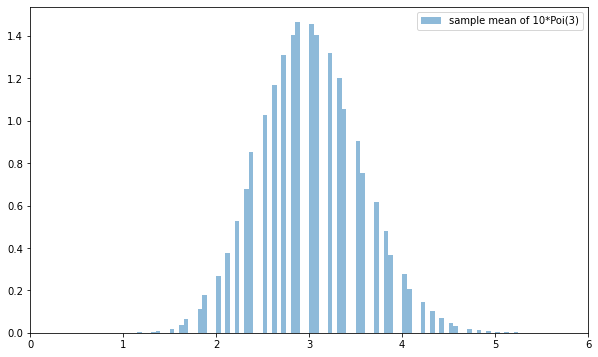

In [52]:
# 포아송분포의 경우 람다 값을 파라미터로 가지는데, 이 때에 기댓값은 람다, 분산도 람다이다.
# 포아송분포의 표본평균 분포는 평균과 분산이 다르다. 
# 이는 포아송분포의 표본평균 분포는 포아송분포를 따르지 않는다는 것을 알 수 있다.
# 표본평균의 분포는 정규분포의 형태를 띈다.

fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True, alpha=0.5, label='sample mean of 10*Poi(3)')

ax.legend()
ax.set_xlim(0,6)
plt.show()

### 중심극한정리
- 확률변수 $X_1,X_2,...Xn$이 서로 독립이고 기댓값이 $\mu, 분산이 {\sigma}^2$인 확률분포 F를 따를 때 n이 커짐에 따라 표본평균 $\bar{X}의 분포는 정규분포 N(\mu,{\sigma}^2/n)$에 가까워진다.


In [ ]:
# 원래의 분포(모집단의 분포)가 뭐였든 간에 표본평균의 분포는 정규분포에 가까워진다는 것.

In [55]:
# 표본평균의 계산을 10000번, 포아송분포로부터의 무작위추출은 10000*10000번 수행
l=3
rv = stats.poisson(l)

n=10000
sample_size=10000
Xs_sample=rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)
# 중심극한정리에 의해 표본평균은 근사적으로 N(3, 3/10000)을 따른다.


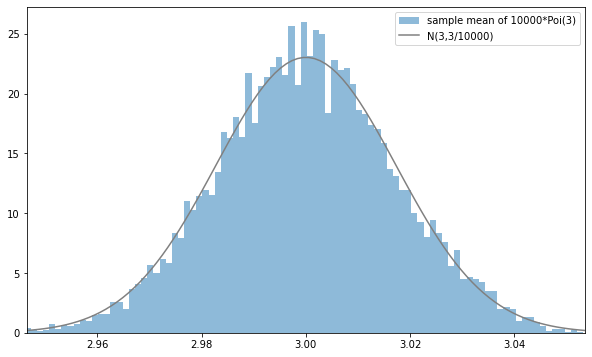

In [56]:
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
# 표본평균의 히스토그램
ax.hist(sample_mean, bins=100, density=True, alpha=0.5, label='sample mean of 10000*Poi(3)')
# 평균이 3이고 분산이 3/10000인 정규분포 밀도함수
ax.plot(xs, rv_true.pdf(xs), label='N(3,3/10000)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()
# 밑에 그래프에서 포아송분포의 표본평균의 분포는 정확히 정규분포와 같지는 않지만 정규분포의 모양을 따르고 있다.

### 대수의 법칙
확률변수 $X_1,X_2,...,X_n$이 서로 독립이고 평균이 $\mu, 분산이 \sigma^2$일 것 같은 확률분포를 따를 때 n이 커짐에 따라 표본평균은 $\mu$에 수렴한다.


[[0.18  0.178 0.171 0.164 0.164 0.162 0.162 0.161 0.162 0.162 0.163 0.162
  0.163 0.163 0.163 0.164 0.164 0.165 0.164 0.164 0.164 0.165 0.165 0.164
  0.164 0.164 0.165 0.165 0.165 0.165 0.165 0.165 0.165 0.165 0.165 0.165
  0.165 0.165 0.165 0.165 0.165 0.166 0.166 0.165 0.165 0.166 0.165 0.166
  0.166 0.166]
 [0.22  0.163 0.168 0.168 0.169 0.168 0.168 0.167 0.167 0.167 0.167 0.166
  0.166 0.166 0.167 0.166 0.167 0.166 0.166 0.166 0.165 0.165 0.166 0.167
  0.167 0.167 0.167 0.168 0.168 0.167 0.168 0.168 0.168 0.168 0.168 0.168
  0.168 0.167 0.168 0.167 0.167 0.167 0.167 0.167 0.166 0.166 0.166 0.166
  0.166 0.166]
 [0.12  0.16  0.167 0.172 0.167 0.163 0.163 0.162 0.163 0.163 0.164 0.164
  0.163 0.164 0.165 0.165 0.165 0.165 0.166 0.166 0.167 0.167 0.167 0.167
  0.167 0.167 0.168 0.167 0.167 0.167 0.167 0.167 0.167 0.166 0.167 0.167
  0.167 0.167 0.167 0.167 0.166 0.167 0.167 0.167 0.167 0.167 0.167 0.167
  0.167 0.166]
 [0.16  0.158 0.163 0.164 0.162 0.161 0.163 0.162 0.164 0.164 0.164

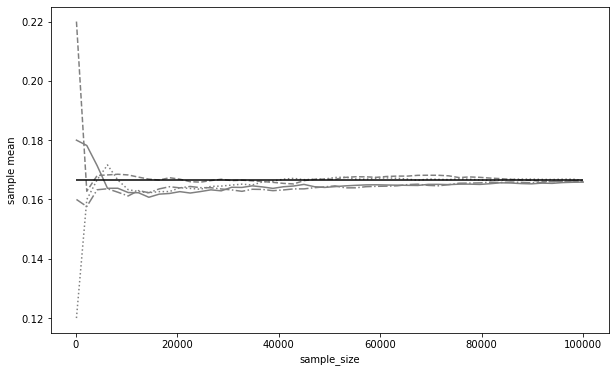

In [69]:
# 가정, 주사위를 굴려서 6이 나오는 확률, 1/6에 가까워짐, 이를 증명하는 것이 대수의 법칙
# 하나, 하나의 시행은 Bern(1/6)을 따름, 표본 크기가 커짐에 따라 표본평균은 1/6에 수렴할 것
p = 1/6
rv = stats.bernoulli(p)
# 표본 크기가 10만인 무작위추출을 4번 한다.
n = int(1e5)
sample = rv.rvs((n,4))
space = np.linspace(100,n,50).astype(int)
# T는 배열 전치
plot_list = np.array([np.mean(sample[:sp], axis=0) for sp in space]).T
print(plot_list)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()

for pl,ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls, color='gray')
ax.hlines(p, -1, n, 'k')
ax.set_xlabel('sample_size')
ax.set_ylabel('sample mean')

plt.show()

#### 과제 0901_2
p251 ~ p260 예제 풀어보기

#### 과제 0901_3
중심극한정리와 대수의 법칙을 사례를 들어 설명하세요.

In [116]:
rv = stats.binom(100,0.5)
np.var(rv.rvs((n,sample_size)))

25.005

In [131]:
# 중심극한정리 이항분포의 사례, 주사위를 100번 굴렸을 때의 확률분포
n = 10

p = 1/6
rv = stats.binom(n, p)

# 위의 사례와 비슷하게 표본평균 계산의 만번, 이항분포로부터 무작위추출 만*만

sample_size = 100

Xs_sample = rv.rvs((n,sample_size))
sample_mean = np.mean(Xs_sample, axis = 0)

print(np.mean(sample_mean))
print(np.var(sample_mean)*n)

rv_true = stats.norm(n*p, np.sqrt(n*p*(1-p)))
Rv_sample = rv_true.rvs((n, sample_size))

print(np.mean(Rv_sample))
print(np.var(Rv_sample))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

1.6320000000000001
1.1777599999999997
1.6860635989930162
1.4117386353522685


In [132]:
Xs_sample

array([[1, 0, 1, 3, 2, 1, 2, 3, 1, 2, 4, 2, 2, 1, 2, 0, 1, 1, 1, 1, 2, 0,
        4, 2, 3, 1, 1, 1, 2, 3, 6, 1, 4, 1, 1, 2, 1, 0, 1, 1, 2, 0, 3, 1,
        2, 1, 2, 3, 2, 2, 2, 2, 0, 0, 4, 1, 1, 2, 2, 2, 0, 0, 2, 0, 1, 3,
        1, 0, 1, 2, 1, 3, 3, 1, 0, 1, 3, 2, 4, 2, 3, 5, 1, 1, 1, 2, 3, 2,
        1, 2, 2, 3, 1, 3, 2, 1, 0, 2, 3, 0],
       [2, 1, 1, 1, 1, 2, 3, 3, 3, 1, 2, 2, 2, 3, 1, 2, 2, 3, 0, 1, 0, 3,
        5, 3, 1, 2, 0, 1, 1, 2, 2, 3, 0, 2, 2, 1, 1, 2, 3, 3, 1, 1, 1, 0,
        1, 1, 0, 1, 2, 4, 1, 1, 2, 1, 1, 2, 4, 1, 2, 0, 3, 2, 2, 1, 1, 2,
        3, 3, 3, 1, 2, 2, 1, 0, 0, 4, 1, 2, 4, 2, 2, 1, 2, 0, 2, 0, 0, 2,
        2, 2, 1, 1, 1, 1, 1, 3, 1, 2, 0, 3],
       [3, 0, 1, 1, 0, 2, 1, 3, 0, 3, 1, 2, 2, 4, 4, 0, 1, 1, 1, 2, 2, 2,
        0, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 2, 3, 2, 1, 0, 4, 2, 2, 2, 0, 2,
        3, 3, 1, 1, 1, 5, 1, 3, 3, 3, 0, 1, 5, 0, 0, 0, 0, 1, 1, 1, 4, 1,
        3, 0, 0, 2, 1, 1, 3, 2, 1, 4, 1, 3, 0, 2, 1, 1, 2, 5, 3, 0, 1, 1,
        3, 2, 1, 2, 3,

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


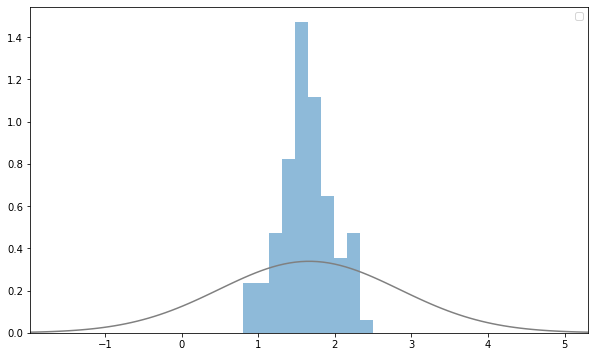

In [133]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=10, density=True, alpha=0.5)
ax.plot(xs, rv_true.pdf(xs), color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))

plt.show()

[[4.68  4.933 4.969 4.966 4.973 4.98  4.983 4.976 4.979 4.976 4.975 4.982
  4.984 4.986 4.987 4.984 4.991 4.993 4.997 4.999 5.004 5.003 5.006 5.006
  5.004 5.004 5.005 5.004 5.003 5.003 5.002 5.002 5.002 5.001 5.002 5.
  5.003 5.002 5.    4.997 4.998 4.999 5.001 5.001 5.002 5.001 5.001 5.001
  5.001 5.002]
 [5.34  5.05  4.999 5.006 4.998 5.009 5.003 5.007 5.001 4.997 5.004 5.011
  5.01  5.007 5.003 5.005 5.005 5.004 5.007 5.007 5.01  5.013 5.008 5.008
  5.008 5.007 5.008 5.007 5.006 5.006 5.003 5.003 5.003 5.005 5.006 5.003
  5.002 5.003 5.002 5.004 5.006 5.007 5.006 5.005 5.004 5.003 5.003 5.002
  5.003 5.004]
 [5.25  4.997 4.985 5.    4.994 4.993 4.991 5.01  5.005 5.008 5.016 5.013
  5.018 5.018 5.015 5.016 5.018 5.013 5.012 5.012 5.008 5.011 5.007 5.007
  5.008 5.008 5.006 5.005 5.002 5.006 5.004 5.007 5.003 5.004 5.003 5.003
  5.005 5.006 5.004 5.004 5.004 5.004 5.004 5.006 5.006 5.005 5.006 5.007
  5.008 5.006]
 [4.99  5.027 5.051 5.026 5.042 5.025 5.04  5.036 5.029 5.03  5.029 5.

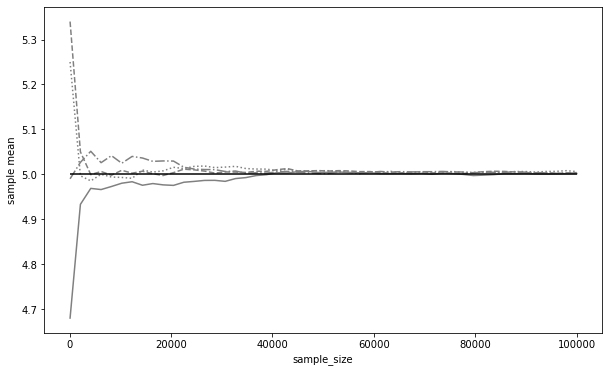

In [136]:
# 가정 lambda 값이 5인 포아송분포를 활용한 대수의 법칙 증명
lam = 5
rv = stats.poisson(lam)
# 표본 크기가 10만인 무작위추출을 4번 한다.
n = int(1e5)
sample = rv.rvs((n,4))
space = np.linspace(100,n,50).astype(int)
# T는 배열 전치
plot_list = np.array([np.mean(sample[:sp], axis=0) for sp in space]).T
print(plot_list)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()

for pl,ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls, color='gray')
ax.hlines(lam, -1, n, 'k')
ax.set_xlabel('sample_size')
ax.set_ylabel('sample mean')

plt.show()